## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

### Load Dataset
- My dataset is Census 17

In [2]:
#loading the dataset
census = pd.read_csv('census17.csv')

- Here I will load the data, make a copy of the data and check the information of the census data

In [3]:
#make a copy of dataset
census_df = census.copy()

- Make a copy of the dataset so that the next steps do not directly impact the original data
- All subsequent steps will be done using the copy

In [4]:
#view the headers
census_df.columns

Index(['House Number', 'Street', 'First Name', 'Surname', 'Age',
       'Relationship to Head of House', 'Marital Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [5]:
#Use the replace method to change spaces in the header to _ 
census_df.columns = census_df.columns.str.replace(' ', '_')

- It is standard practice to replace space with hyphen in headers as space is usually prone to errors

In [6]:
#check that spaces in headers have been replaced with hyphen
census_df.columns

Index(['House_Number', 'Street', 'First_Name', 'Surname', 'Age',
       'Relationship_to_Head_of_House', 'Marital_Status', 'Gender',
       'Occupation', 'Infirmity', 'Religion'],
      dtype='object')

In [7]:
#view the first 5 rows of the dataset
census_df.head()

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
0,1,Northumberland Drive,Susan,Jackson,35.0,Head,Single,Female,Ceramics designer,None,Catholic
1,2,Northumberland Drive,Sara,Williams,73.0,Head,Widowed,Female,"Retired Lecturer, further education",None,Christian
2,3,Northumberland Drive,Aimee,Adams,39.0,Head,Single,Female,"Nurse, adult",None,None
3,4,Northumberland Drive,Henry,Allen,56.0,Head,Single,Male,Dentist,None,None
4,5,Northumberland Drive,Jasmine,Connolly,45.0,Head,Single,Female,"Designer, textile",None,Catholic


In [8]:
#view dataset
census_df

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
0,1,Northumberland Drive,Susan,Jackson,35.0,Head,Single,Female,Ceramics designer,None,Catholic
1,2,Northumberland Drive,Sara,Williams,73.0,Head,Widowed,Female,"Retired Lecturer, further education",None,Christian
2,3,Northumberland Drive,Aimee,Adams,39.0,Head,Single,Female,"Nurse, adult",None,None
3,4,Northumberland Drive,Henry,Allen,56.0,Head,Single,Male,Dentist,None,None
4,5,Northumberland Drive,Jasmine,Connolly,45.0,Head,Single,Female,"Designer, textile",None,Catholic
...,...,...,...,...,...,...,...,...,...,...,...
7753,1,Westminster Citadel,Justin,Patel,21.0,None,Single,Male,University Student,None,None
7754,1,Westminster Citadel,Karen,Brooks,19.0,None,Single,Female,Advertising account planner,None,None
7755,1,Westminster Citadel,Kirsty,King,40.0,None,Single,Female,Nutritional therapist,None,None
7756,1,Westminster Citadel,Raymond,Lee,39.0,None,Single,Male,"Therapist, sports",None,Methodist


## Exploratory Data Analysis (EDA)


### Checking Data Features
- Learning about the dataset and exploring its features

In [9]:
#check number of rows and columns in the data 
census_df.shape

(7758, 11)

#### Observations
- The data has 7758 rows and 11 columns

In [10]:
#check data type
census_df.dtypes

House_Number                       int64
Street                            object
First_Name                        object
Surname                           object
Age                              float64
Relationship_to_Head_of_House     object
Marital_Status                    object
Gender                            object
Occupation                        object
Infirmity                         object
Religion                          object
dtype: object

#### Observations
- The dataset has 9 columns with object as  data type, while the datatype of age and house number columns were reported as float and integer respectively

In [11]:
#for more information on the dataset
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7758 entries, 0 to 7757
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   House_Number                   7758 non-null   int64  
 1   Street                         7758 non-null   object 
 2   First_Name                     7758 non-null   object 
 3   Surname                        7758 non-null   object 
 4   Age                            7758 non-null   float64
 5   Relationship_to_Head_of_House  7758 non-null   object 
 6   Marital_Status                 6002 non-null   object 
 7   Gender                         7758 non-null   object 
 8   Occupation                     7758 non-null   object 
 9   Infirmity                      7758 non-null   object 
 10  Religion                       5942 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 666.8+ KB


#### Observations
- Non-null value count of each column are not the same, indicating null values in some columns

In [12]:
#check for null values in the data
census_df.isna().sum()

House_Number                        0
Street                              0
First_Name                          0
Surname                             0
Age                                 0
Relationship_to_Head_of_House       0
Marital_Status                   1756
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1816
dtype: int64

#### Observations
- There are 1756 missing values in Marital_Status
- There are 1816 missing values in Religion

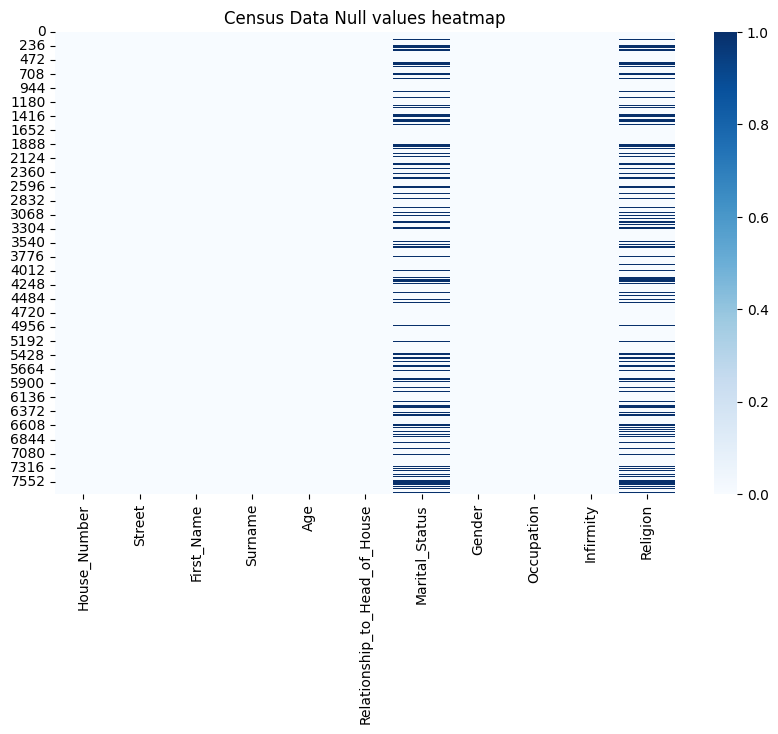

In [13]:
#plot heatmap to show the null values
plt.figure(figsize = (10, 6))
heatmap = sbn.heatmap(census_df.isnull(), cmap= 'Blues').set(title= 'Census Data Null values heatmap')
plt.savefig('./heatmap.png')

#### Observations
- The heatmap above shows that there null values in the Marital Status and Religion columns and the gaps in the data appear to be around the same range of index numbers which implies that those missing Marital Status are also missing Religion

In [14]:
#check for the variables with empty string " "

census_df.eq(" ").sum()

House_Number                     0
Street                           0
First_Name                       0
Surname                          1
Age                              0
Relationship_to_Head_of_House    0
Marital_Status                   1
Gender                           1
Occupation                       0
Infirmity                        7
Religion                         0
dtype: int64

#### Observations
- Empty Strings are found in four columns.
- There is one empty string in each of Surname, Marital_Status and Gender
- Infirmity has 7 empty strings

In [15]:
#next I check details of my data and include all columns
census_df.describe(include = 'all')

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
count,7758.000000,7758,7758,7758,7758.000000,7758,6002,7758,7758,7758,5942
unique,NaN,105,364,625,NaN,22,5,3,1074,8,14
top,NaN,St.Mary Field,Katherine,Smith,NaN,Head,Single,Female,Student,None,None
freq,NaN,603,35,223,NaN,3006,2693,4052,1378,7690,2608
mean,33.264630,NaN,NaN,NaN,36.552786,NaN,NaN,NaN,NaN,NaN,NaN
std,43.493599,NaN,NaN,NaN,21.759203,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.000000,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,19.000000,NaN,NaN,NaN,36.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations
- Polpulation mean age is 36.5, close to median of 36, with a max age of 108 years and a minimum age of 0
- From the data, 2,693 of the residents are single
- 4052 of the population are female 
- The population has a significant number of students of 1378

### Data Cleaning

- The steps that follow are taken to ensure that the data is consistent, accurate, and ready for analysis.
- From the Data Feature checks, I have determined that the following columns require cleaning: Surname, Age, Marital_Status, Gender, Infirmity & Religion.
- However, for a thorough job, I will run general checks on each column for errors or inconsistencies
- Visualisations will be done as necessary for relevant columns after cleaning

### Checking for Duplicates

In [16]:
#checking my dataset for duplicates
census_df.duplicated().sum()

1

In [17]:
#viewing the duplicated data
census_df[census_df.duplicated(keep = False)]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
593,25,Stoke Garden,Marilyn,Knowles,2.0,Daughter,NaN,Female,Child,None,NaN
594,25,Stoke Garden,Marilyn,Knowles,2.0,Daughter,NaN,Female,Child,None,NaN


#### Observations
- This entry is obviously duplicated, so I drop one of the entries.
- Then I proceed to check for other possible duplicates by setting First_Name, Surname and Age in the subset parameters

In [18]:
#drop the duplicate as follows
census_df = census_df.drop_duplicates()

In [19]:
#confirm that it has dropped
census_df.duplicated().sum()

0

In [20]:
#check for other possible duplicates based on specific columns, sorted by First_Name
census_df[census_df.duplicated(subset = ['First_Name', 'Surname', 'Age'],keep = False)].sort_values(by = 'First_Name')

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
539,12,Stoke Garden,Bradley,Williams,36.0,None,Divorced,Male,Applications developer,None,Catholic
4416,40,Gardner Manor,Bradley,Williams,36.0,Lodger,Divorced,Male,"Therapist, sports",None,Christian
3069,94,Cougar Branch,Natasha,Williams,28.0,Partner,Single,Female,"Secretary, company",None,None
3509,83,Clark Highway,Natasha,Williams,28.0,Daughter,Single,Female,"Surveyor, hydrographic",None,Christian
2304,27,Henge Hollow,Rhys,Thompson,0.0,Step-Son,NaN,Male,Child,None,NaN
4377,26,Gardner Manor,Rhys,Thompson,0.0,Son,NaN,Male,Child,None,NaN
788,9,Outer Orchard,Wendy,Smith,20.0,None,Single,Female,University Student,None,NaN
3019,72,Cougar Branch,Wendy,Smith,20.0,Granddaughter,Single,Female,University Student,None,Christian


#### Observations
- I have 4 instances of possible duplicated data.
- Even though both Bradley Williams are of the same age, they live at different addresses and have different occupation so they are probably not the same persons. This also applies to Natasha Williams.
- However, Rhys Thompson is an infant, a step-son in one instance and a son in the other with different addresses, possibly he has a step parent in one address and a parent in the other.
- Wendy Smith is also a university student, a grandaughter in one address and no relationship to the head of house in the other.
- So I checked the four households for more information, confirmed they were duplicates then I dropped one of each entries where Rhys is the stepson and where Wendy has no relationship to head of house.

In [21]:
#checking Rhys Thompson's house where he is a stepson
census_df[   (census_df['House_Number'] == 27) & (census_df['Street'] == 'Henge Hollow') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
2303,27,Henge Hollow,Brett,Whittaker,33.0,Head,Divorced,Male,Hydrographic surveyor,None,Christian
2304,27,Henge Hollow,Rhys,Thompson,0.0,Step-Son,NaN,Male,Child,None,NaN
2305,27,Henge Hollow,Gemma,Robinson,33.0,Sibling,Divorced,Female,Unemployed,None,None
2306,27,Henge Hollow,Amber,Roberts,54.0,Lodger,Divorced,Female,"Development worker, community",None,Catholic


In [22]:
#checking Rhys Thompson's house where he is the son
census_df[   (census_df['House_Number'] == 26) & (census_df['Street'] == 'Gardner Manor') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4374,26,Gardner Manor,Jemma,Thompson,30.0,Head,Married,Female,Charity officer,None,Catholic
4375,26,Gardner Manor,Robert,Thompson,36.0,Husband,Married,Male,"Scientist, audiological",None,Catholic
4376,26,Gardner Manor,Julia,Thompson,3.0,Daughter,NaN,Female,Child,None,NaN
4377,26,Gardner Manor,Rhys,Thompson,0.0,Son,NaN,Male,Child,None,NaN


#### Observations
- We can infer that Rhys Thompson is the same person in both households, in the first household the step-parent, Bret Whittaker is divorced and may have been divorced from the other parent, Jemma Thompson in household 2. 
- The surname is consistent in household 2 where his relationship is son so I decided to drop his data from the first household 

In [23]:
#dropping the row where Rhys Thompson is the stepson
census_df = census_df.drop(2304)

In [24]:
#check the household to be sure stepson has been dropped
census_df[(census_df['House_Number'] == 27) & (census_df['Street'] == 'Henge Hollow') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
2303,27,Henge Hollow,Brett,Whittaker,33.0,Head,Divorced,Male,Hydrographic surveyor,None,Christian
2305,27,Henge Hollow,Gemma,Robinson,33.0,Sibling,Divorced,Female,Unemployed,None,None
2306,27,Henge Hollow,Amber,Roberts,54.0,Lodger,Divorced,Female,"Development worker, community",None,Catholic


In [25]:
#checking Wendy Smith's house where she is unrelated to head of house
census_df[   (census_df['House_Number'] == 9) & (census_df['Street'] == 'Outer Orchard') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
785,9,Outer Orchard,Damien,Bailey,18.0,Head,Single,Male,University Student,None,None
786,9,Outer Orchard,Lynne,King,18.0,None,Single,Female,University Student,None,None
787,9,Outer Orchard,Garry,Humphreys,20.0,None,Single,Male,University Student,None,Christian
788,9,Outer Orchard,Wendy,Smith,20.0,None,Single,Female,University Student,None,NaN


In [26]:
#checking Wendy Smith's house where she is the Grand daughter
census_df[   (census_df['House_Number'] == 72) & (census_df['Street'] == 'Cougar Branch') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
3018,72,Cougar Branch,Sian,Smith,59.0,Head,Single,Female,Fine artist,None,Christian
3019,72,Cougar Branch,Wendy,Smith,20.0,Granddaughter,Single,Female,University Student,None,Christian
3020,72,Cougar Branch,Julia,Smith,16.0,Granddaughter,NaN,Female,Student,None,NaN


#### Observations
- We can infer that Wendy Smith's data is duplicated as they are all university students staying togther in the first household while she is staying with her Grandmother in the other house.
- So I will drop her details from the household where she has no relationship to the Head of House

In [27]:
#dropping the row where Wendy Smith has no relationship to head of house
census_df.drop([788],inplace = True)

In [28]:
#check that Wendy has been dropped from the student household
census_df[   (census_df['House_Number'] == 9) & (census_df['Street'] == 'Outer Orchard') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
785,9,Outer Orchard,Damien,Bailey,18.0,Head,Single,Male,University Student,None,None
786,9,Outer Orchard,Lynne,King,18.0,None,Single,Female,University Student,None,None
787,9,Outer Orchard,Garry,Humphreys,20.0,None,Single,Male,University Student,None,Christian


## Checking the Columns

### House_Number

In [29]:
#check data type
census_df['House_Number'].dtype

dtype('int64')

In [30]:
#check unique values of the 'House_Number' column
census_df['House_Number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [31]:
#check for null values in the column
census_df.House_Number.isna().any()

False

In [32]:
#check for empty strings
census_df[census_df.House_Number == '']


,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


#### Observations
- The above checks show that there are no null values or empty spaces in the House_Number column

### Street

In [33]:
#check unique values of the 'Street' column
census_df['Street'].unique()

array(['Northumberland Drive', 'Ricehall Avenue', 'Kaur Street',
       'Virgo Street', 'Stoke Garden', 'Myers Vista', 'Murphy Harbors',
       'Outer Orchard', 'Pollard Street', 'Clarke Parkway',
       'Glasgow Spurs', 'Brown Lane', 'Ellis Trail', 'Bennett Plain',
       'Statue Avenue', 'Kirk Row', 'Sandy Crescent', 'Wales Islands',
       'Edwards Oval', 'Telegraphtun Drive', 'Embankment Burg',
       'Evans Lane', 'Manchester Rue', 'Elephant Coves',
       'Haymarket Crescent', 'Jones Street', 'Gwent Lodge',
       "O'Neill Field", 'Wales Mission', 'Henge Hollow', 'Connor Road',
       'Sunderland Road', 'Goddard Meadows', 'Guinevere Station',
       'Watson Flats', 'Cougar Branch', 'Ouse Drive', 'Field Parks',
       'Winter Plaza', 'August Vista', 'Brightwater Centers',
       'Goldfishdike Lane', 'Clark Highway', 'Lavendar Islands',
       'St.Mary Field', 'Gardner Manor', 'Noble Drive', 'Baker Via',
       'Mann Islands', 'Bletchleybind Avenue', 'Godfrey Dale',
       'Ahmed V

In [34]:
#check street for null values
census_df.Street.isna().any()

False

In [35]:
#check for empty strings
#census_df[census_df.Street == '']
census_df[census_df['Street'].str.isspace() == True]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


#### Observations
- The above checks show that there are no null values or empty spaces in the Street column

### First_Name

In [36]:
#check unique values of the 'First_Name' column
census_df['First_Name'].unique()

array(['Susan', 'Sara', 'Aimee', 'Henry', 'Jasmine', 'Aaron', 'Stephanie',
       'Charlene', 'Patrick', 'Benjamin', 'Olivia', 'Caroline', 'Dennis',
       'Donald', 'Alice', 'Mathew', 'Grace', 'Chloe', 'Dorothy', 'Josh',
       'Andrea', 'Marilyn', 'Craig', 'Toby', 'Daniel', 'Adam', 'Katy',
       'Amanda', 'Terry', 'Amy', 'Mandy', 'Gavin', 'Joseph', 'Michael',
       'Pamela', 'Leigh', 'Geoffrey', 'Rosemary', 'Brian', 'Eileen',
       'Kelly', 'Sean', 'Iain', 'Annette', 'Katie', 'Leon', 'Kathryn',
       'Frederick', 'Ben', 'Mitchell', 'Kirsty', 'Mohammed', 'Vanessa',
       'Debra', 'James', 'Derek', 'Diana', 'Graeme', 'Kenneth', 'Denis',
       'Karen', 'Justin', 'Jeffrey', 'Mary', 'Eleanor', 'Denise', 'Gemma',
       'Brenda', 'Jason', 'Reece', 'Diane', 'Jacqueline', 'Holly',
       'Maria', 'Cheryl', 'Carolyn', 'Rebecca', 'Dominic', 'Anthony',
       'Sarah', 'Jennifer', 'Mohamed', 'Roger', 'Conor', 'Natasha',
       'Gerard', 'Geraldine', 'Hugh', 'Joanne', 'Ann', 'Lee', 'Josephi

In [37]:
#check First_Name for null values
census_df.First_Name.isna().any()

False

In [38]:
#check for empty strings
#census_df[census_df.First_Name == ' ']
census_df[census_df['First_Name'].str.isspace() == True]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


#### Observations
- The above checks show that there are no null values or empty strings in the Street column

### Surname

In [39]:
#check unique values of the 'Surname' column
census_df['Surname'].unique()

array(['Jackson', 'Williams', 'Adams', 'Allen', 'Connolly', 'Clark',
       'Greenwood', 'Nolan', 'Ferguson', 'Bishop', 'Hodgson', 'Palmer',
       'Baker', 'Price', 'Fitzgerald', 'Archer', 'Murray', 'Hicks',
       'Davies', 'Patel', 'Wilkins', 'Buckley', 'Pearce', 'Stokes',
       'Brooks', 'Cunningham', 'Knight', 'Thompson', 'Miller', 'Parkin',
       'Ward', 'Long', 'Lawrence', 'Naylor', 'Gill', 'Woods', 'Hill',
       'Thomas', 'Parker', 'Smith', 'Ellis', 'Dixon', 'Farmer', 'Francis',
       'Hussain', 'Ross', 'Harris', 'Gray', 'Macdonald', 'Holt', 'Oliver',
       'Peacock', 'Hughes', 'Scott', 'Arnold', 'Wood', 'Anderson',
       'Middleton', 'Forster', 'Bates', 'Watson', 'Holmes', 'Wilson',
       'Grant', 'Hunter', 'Storey', 'Butler', 'Gardner', 'Smart', 'Davis',
       'Jenkins', 'Evans-Jenkins', 'Cross', 'Jones', 'Bond', 'Booth',
       'King', 'Murphy-King', 'Taylor', 'Williams-Ford', 'Parker-Lee',
       'Potter', 'Powell', 'Evans', 'Robinson', 'Moore', 'Hall',
       'Step

In [40]:
#check Surname for null values
census_df.Surname.isna().any()

False

In [41]:
#check for empty spaces
census_df[census_df['Surname'].str.isspace() == True]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4682,3,Godfrey Dale,Julia,,43.0,Head,Married,Female,Insurance account manager,None,None


In [42]:
#check if there are others living at same address for more information that will help fill the missing space
census_df[   (census_df['House_Number'] == 3) & (census_df['Street'] == 'Godfrey Dale') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
4682,3,Godfrey Dale,Julia,,43.0,Head,Married,Female,Insurance account manager,None,None
4683,3,Godfrey Dale,Nigel,Ali,46.0,Husband,Married,Male,Magazine features editor,None,None
4684,3,Godfrey Dale,Anthony,Ali,0.0,Son,NaN,Male,Child,None,NaN


#### Observations
- we can infer from the above that the missing info in Julia's Surname should be Ali going by her husband's surname

In [43]:
#I fill the empty space with Ali as follows
census_df.loc[4682,'Surname'] =  'Ali'

In [44]:
#check that the information has been correctly filled
census_df.loc[4682]

House_Number                                             3
Street                                        Godfrey Dale
First_Name                                           Julia
Surname                                                Ali
Age                                                   43.0
Relationship_to_Head_of_House                         Head
Marital_Status                                     Married
Gender                                              Female
Occupation                       Insurance account manager
Infirmity                                             None
Religion                                              None
Name: 4682, dtype: object

In [45]:
#check for empty spaces
census_df[census_df['Surname'].str.isspace() == True]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


#### Observations
- There are no more null spaces or empty string in this column

### Age

In [46]:
#checking the data type of Age column
census_df['Age'].dtype

dtype('float64')

In [47]:
#checking the unique values in the age column
census_df['Age'].unique()

array([ 35.        ,  73.        ,  39.        ,  56.        ,
        45.        ,  13.        ,  21.        ,  48.        ,
        49.        ,  89.        ,  29.        ,  46.        ,
        23.        ,  33.        ,  32.        ,  40.        ,
        11.        ,  80.        ,  74.        ,  34.        ,
        69.        ,  51.        ,  75.        ,  76.        ,
        41.        ,  52.        ,  57.        ,  59.        ,
        36.        ,  83.        ,  25.        ,  18.        ,
         8.        ,  60.        ,  62.        ,  63.        ,
        27.        ,  72.        ,  77.        ,  54.        ,
         5.        ,   7.        ,  42.        ,  26.        ,
        43.        ,   9.        ,   6.        ,  17.        ,
        14.        ,  28.        ,  24.        ,  53.        ,
        19.        ,  16.        ,  15.        ,  50.        ,
        22.        ,  44.        ,   0.        ,   4.        ,
        12.        ,  65.        ,  10.        ,   2.  

#### Observations
- The age value is not consistent as the numerics have different precisions with some in 8 decimal places.
- So the datatype of age column was converted to integer for consistency with how human age is reported

In [48]:
#convert the datatype of age to integer for consistency
census_df.loc[:, 'Age'] = census_df.loc[:, 'Age'].astype(int)

C:\Users\Hp\AppData\Local\Temp\ipykernel_6896\457906433.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  census_df.loc[:, 'Age'] = census_df.loc[:, 'Age'].astype(int)


In [49]:
#check that data type of Age has changed
display(census_df['Age'].dtypes)

dtype('int32')

In [50]:
#check for null values
census_df.Age.isna().any()

False

In [51]:
#check for empty spaces
census_df[census_df['Age'] == ' ']

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


#### Observations
- There are no null spaces or empty strings

In [52]:
#Check the statistical summary of Age column
census_df['Age'].describe()

count    7755.000000
mean       36.563765
std        21.754401
min         0.000000
25%        19.000000
50%        36.000000
75%        52.000000
max       108.000000
Name: Age, dtype: float64

In [53]:
#check the age with highest frequency
census_df.Age.mode()

0    37
Name: Age, dtype: int32

### Age Visualisation

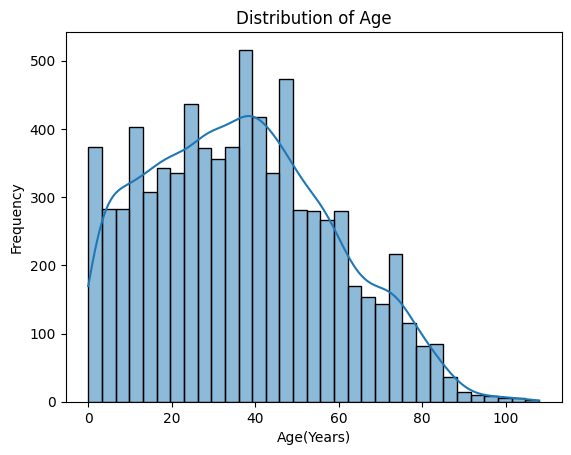

In [54]:
#univariate plot of the Age column
sbn.histplot(data = census_df, x = "Age", kde = True); #plot histogram
plt.title("Distribution of Age") #add a title
plt.xlabel("Age(Years)") #add x-label
plt.ylabel("Frequency") #add y-label
plt.savefig('./AgeDistribution.png') #save image

#### Observations
- The distribution of Age column in the image above appears to be slightly positively skewed as the tail extends somewhat to the right. However, the age with the highest frequency is 37.

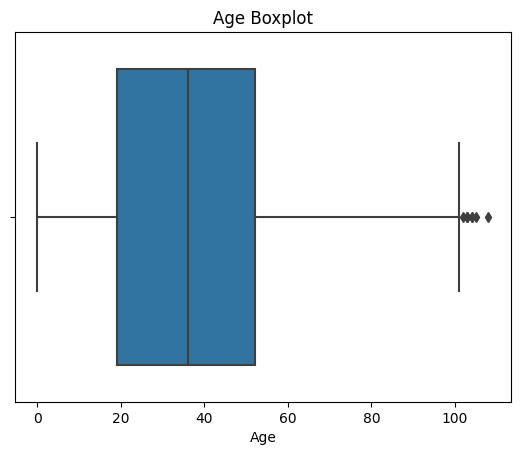

In [55]:
#Boxplot of the Age column
sbn.boxplot(data = census_df, x = "Age"); #plot boxplot
plt.title('Age Boxplot') #add title
plt.savefig('./Agebox.png') #save image

#### Observations
- The boxplot image clearly shows some outliers above the age of 100. so I run some checks to ascertain if they are recording errors, lies or genuine values

### Checking for Outliers

In [56]:
#check persons older than 100
census_df[census_df['Age'] > 100].sort_values(by='Age', ascending=False)

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6357,23,Albion Tunnel,Billy,Robinson,108,Husband,Married,Male,"Retired Surveyor, planning and development",None,Christian
6356,23,Albion Tunnel,Zoe,Robinson,105,Head,Married,Female,Retired Marketing executive,None,Christian
1920,17,Jones Street,Dylan,Wade,104,Husband,Married,Male,Retired Public relations account executive,None,None
5057,5,Ahmed Ville,Diane,Wallis,104,Head,Married,Female,Retired Nutritional therapist,None,None
3338,14,Goldfishdike Lane,Lindsey,Harris,103,Head,Widowed,Female,Retired Sales promotion account executive,None,None
5058,5,Ahmed Ville,Dean,Wallis,103,Husband,Married,Male,Retired Animal technologist,None,None
6394,6,Turnbull Drive,Abigail,Kelly,103,Head,Single,Female,Unemployed,None,None
5142,5,Corporation Lane,William,Murphy,102,Husband,Married,Male,Retired Building services engineer,None,None
5284,15,Salamander Pines,Charlie,Moore,101,Head,Widowed,Male,Retired Occupational therapist,None,Christian


#### Observations
- Billy Robinson is the oldest citizen at 108 years old, followed closely by his spouse Zoe, so even though this age is an outlier as shown in the boxplot, it is not an error as it is consistent with the wife's age and they are both Retired.
- This is similar for Diane and Dean Wallis who are both 104 years and 103 years respectively.
- The minimum and maximum ages are within reasonable limits so no adjustments are required in this regard
- Similarly, the ages of Dylan Wade, Lindsey Harris, William Murphy and Charlie Moore all appear to be genuine as they are consistent with their Retired status and are either Married or Widowed. 
- I run further checks on Abigail Kelly who claims to be 103 years old as she is single and unemployed.

In [57]:
census_df.query('House_Number == 6 and Street =="Turnbull Drive"')

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6394,6,Turnbull Drive,Abigail,Kelly,103,Head,Single,Female,Unemployed,None,None


#### Observations
- The Household does not provide any more information about Abigail. Even though it is not common to be single at the age of 103 it is not impossible so the data was retained. However, Occupation was imputed to Retired unemployed which will be grouped under retired as she is too old to be actively seeking employment. 

In [58]:
#change occupation
census_df.loc[6394,'Occupation'] = 'Retired Unemployed'

### Relationship_to_Head_of_House

In [59]:
#checking the unique values in Relationship_to_Head_of_House column
census_df['Relationship_to_Head_of_House'].unique()

array(['Head', 'Son', 'Partner', 'Husband', 'Daughter', 'None',
       'Grandson', 'Granddaughter', 'Nephew', 'Neice', 'Lodger', 'Wife',
       'Sibling', 'Step-Son', 'Step-Daughter', 'Cousin', 'Adopted Son',
       'Visitor', 'Adopted Daughter', 'Adopted Granddaughter',
       'Adopted Grandson', 'Son-in-law'], dtype=object)

#### Observations
- Niece is wrongly spelt as Neice

In [60]:
#wrong spelling is corrected as follows
census_df.loc[(census_df['Relationship_to_Head_of_House'] == 'Neice'),:]\
= census_df.loc[(census_df['Relationship_to_Head_of_House'] == 'Neice'),:].replace('Neice', 'Niece')

In [61]:
#check unique features to be sure correction has been effected
census_df['Relationship_to_Head_of_House'].unique()

array(['Head', 'Son', 'Partner', 'Husband', 'Daughter', 'None',
       'Grandson', 'Granddaughter', 'Nephew', 'Niece', 'Lodger', 'Wife',
       'Sibling', 'Step-Son', 'Step-Daughter', 'Cousin', 'Adopted Son',
       'Visitor', 'Adopted Daughter', 'Adopted Granddaughter',
       'Adopted Grandson', 'Son-in-law'], dtype=object)

### Checking for the possiblity of a lie

In [62]:
#check that all Heads of House are 18 and above
census_df[   (census_df['Relationship_to_Head_of_House'] == 'Head') & (census_df['Age'] < 18) ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
5500,7,Booth Street,Holly,Davies,17,Head,Married,Female,Student,None,NaN


In [63]:
#let's have a look at the household if we can get more information
census_df[   (census_df['House_Number'] == 7) & (census_df['Street'] == 'Booth Street') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
5500,7,Booth Street,Holly,Davies,17,Head,Married,Female,Student,None,NaN
5501,7,Booth Street,Jake,Davies,19,Husband,Married,Male,University Student,None,None
5502,7,Booth Street,Jason,Davies,0,Son,NaN,Male,Child,None,NaN
5503,7,Booth Street,Lauren,Horton,48,Lodger,Single,Female,Information systems manager,None,None


#### Observations
- My data has one instance of a minor who is married and also claims to be head of house
- The project stipulates that Head of House should be at least 18 years old
- The Head in this case is married and a check on the household shows her husband meets the age requirement. 
- So I swap the relationship, making Jake Davies the Head and Holly Davies the Wife
- Before the Marriage Act of 1929, persons who had attained the age of puberty could get married. The legal age of puberty for  was 12 and 14 years for females and males respectively (Vatuna, 2020).
- Based on the above, the family's data is retained as the marriage is considered legal at that time.

In [64]:
#switching the Relationships
census_df.loc[[5500,5501], 'Relationship_to_Head_of_House'] = ['Wife', 'Head']

In [65]:
#switch the index so that the Head is at the top for this house address
wife_row = census_df.loc[5500].copy()
census_df.loc[5500] = census_df.loc[5501]
census_df.loc[5501] = wife_row

In [66]:
#check to see that changes have been made
census_df[   (census_df['House_Number'] == 7) & (census_df['Street'] == 'Booth Street') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
5500,7,Booth Street,Jake,Davies,19,Head,Married,Male,University Student,None,None
5501,7,Booth Street,Holly,Davies,17,Wife,Married,Female,Student,None,NaN
5502,7,Booth Street,Jason,Davies,0,Son,NaN,Male,Child,None,NaN
5503,7,Booth Street,Lauren,Horton,48,Lodger,Single,Female,Information systems manager,None,None


### Relationship to Head of House Visualisation

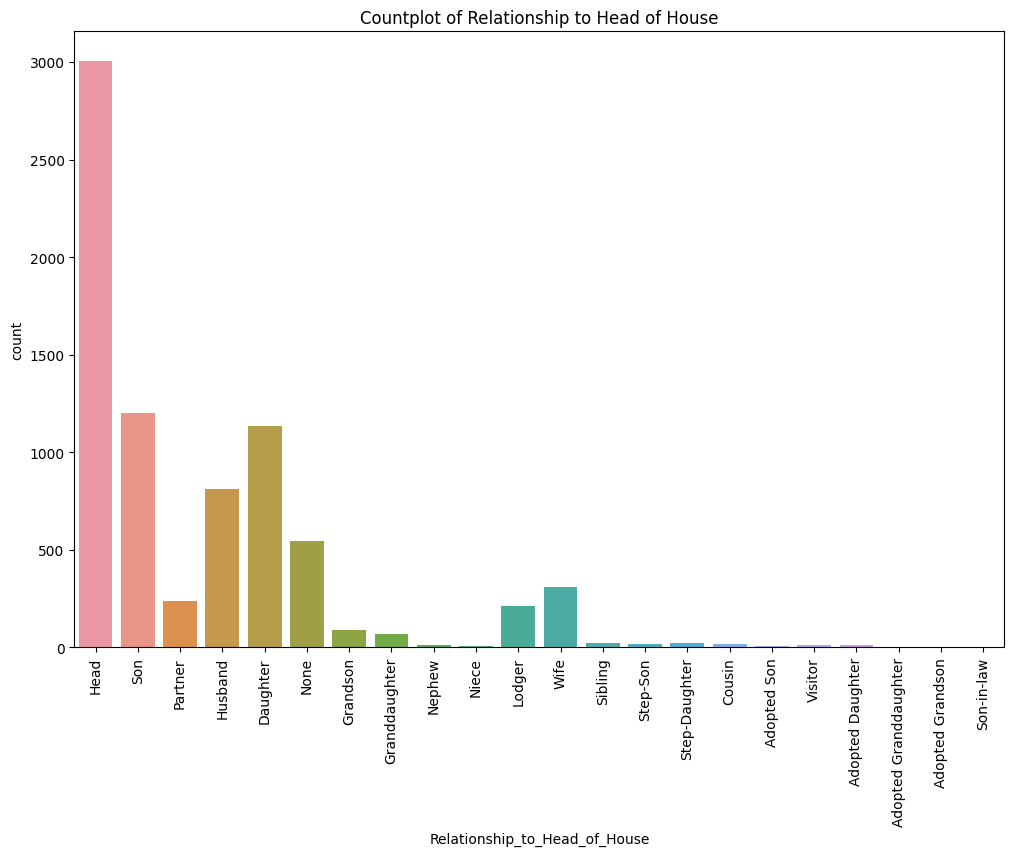

In [67]:
#univariate plot of the Relationship_to_Head_of_House Column
plt.figure(figsize=(12,8)) #state figure size
#plot countplot and add title
sbn.countplot(x = census_df ["Relationship_to_Head_of_House"]).set(title = 'Countplot of Relationship to Head of House') 
plt.xticks(rotation=90) #rotate xticks-labels to uncluster it
plt.show() #display plot

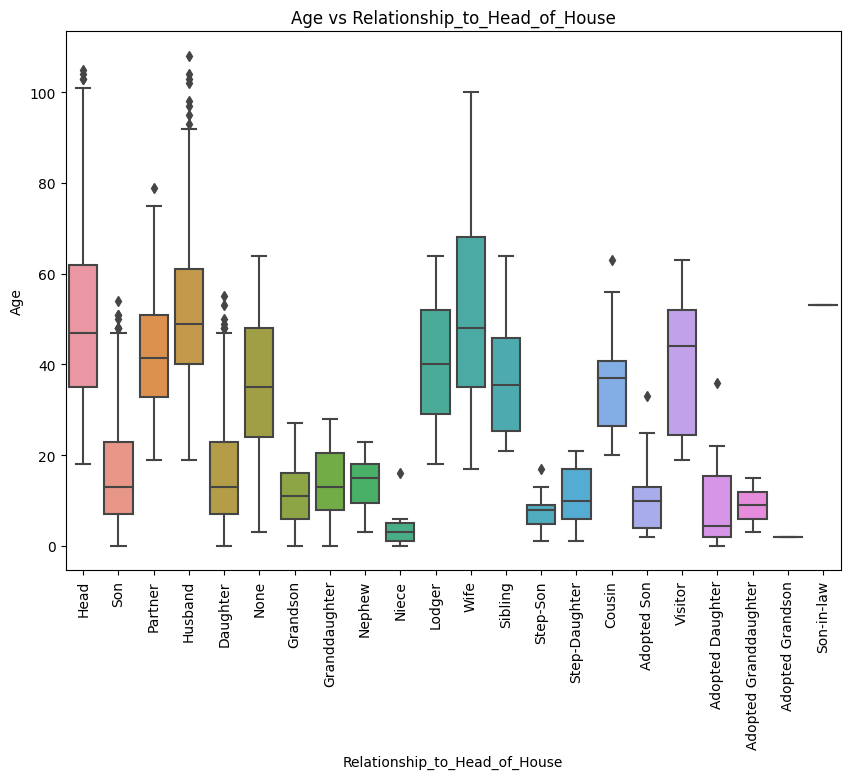

In [68]:
plt.figure(figsize = (10,7)); #set figure size
sbn.boxplot(data=census_df, x = 'Relationship_to_Head_of_House', y = 'Age'); #plot image
plt.title('Age vs Relationship_to_Head_of_House') #set title
plt.xticks(rotation = 90); #set xticks labels rotation for readability

#### Observations
- From the image above, the unique value 'Head' has the highest frequency in the dataset
- This is followed by Son and Daughter within close range
- The box plot shows some outliers though in general, the median ages of Head, Husband and Wife are within close range

###  Marital Status

In [69]:
#check unique features of Marital Status column
census_df['Marital_Status'].unique()

array(['Single', 'Widowed', nan, 'Divorced', 'Married', ' '], dtype=object)

In [70]:
#check the count of the unique values
census_df['Marital_Status'].value_counts()

Single      2692
Married     2250
Divorced     703
Widowed      355
               1
Name: Marital_Status, dtype: int64

#### Observations
- the above checks show that there is one empty string in the Marital_Status column in addition to the NaN values seen in earlier checks

In [71]:
#check null values in the Marital_Status column
census_df.Marital_Status.isna().sum()

1754

In [72]:
#resolving nan values
#first i call up the data of those with marital status as nan values
census_df[census_df.Marital_Status.isna()]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
5,5,Northumberland Drive,Aaron,Connolly,13,Son,NaN,Male,Student,None,NaN
21,14,Northumberland Drive,Marilyn,Fitzgerald,13,Daughter,NaN,Female,Student,None,NaN
22,14,Northumberland Drive,Craig,Fitzgerald,11,Son,NaN,Male,Student,None,NaN
46,28,Northumberland Drive,Katie,Gill,8,Daughter,NaN,Female,Student,None,NaN
63,1,Ricehall Avenue,Denis,Hussain,5,Son,NaN,Male,Student,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7744,1,Waterloo Granary,Aaron,Lawrence,16,Son,NaN,Male,Student,None,NaN
7746,1,Black House,Trevor,Patel,13,Son,NaN,Male,Student,None,NaN
7747,1,Black House,Leigh,Patel,11,Son,NaN,Male,Student,None,NaN
7748,1,Black House,David,Patel,9,Son,NaN,Male,Student,None,NaN


In [73]:
# then i run the check below to confirm that the people without Marital Status are below 18 

if census_df[census_df['Age'] < 18]['Marital_Status'].isna().all():
    print('All null values in "Marital_Status" column are minors')
else:
    print('Not all null values in "Marital_Status" column are minors')

Not all null values in "Marital_Status" column are minors


#### Observations
- It is noted that all the null values in the dataset are persons below 18, so I fill the null values with 'Minor'

In [74]:
#fill null values with 'minor'
census_df.loc[census_df['Age'] < 18, 'Marital_Status'] = census_df.loc[census_df['Age'] < 18, 'Marital_Status'].fillna('Minor')

In [75]:
#check that all null values have been filled
census_df['Marital_Status'].isna().sum()

0

In [76]:
#check random to be sure they were correctly filled
census_df['Marital_Status'].sample(10)

5920     Married
5707      Single
6192      Single
1352     Married
4500      Single
5182      Single
928      Married
2587      Single
6188      Single
6626    Divorced
Name: Marital_Status, dtype: object

In [77]:
#next i call up the data that has space
census_df[census_df['Marital_Status'].str.isspace() == True]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
3929,88,St.Mary Field,Ryan,Clark,52,Lodger,,Male,Animal technologist,None,None


In [78]:
#checking his household
census_df[   (census_df['House_Number'] == 88) & (census_df['Street'] == 'St.Mary Field') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
3927,88,St.Mary Field,Emma,Brown,29,Head,Single,Female,"Engineer, communications",None,Sikh
3928,88,St.Mary Field,Jay,Walton,30,Partner,Single,Male,Systems developer,None,Sikh
3929,88,St.Mary Field,Ryan,Clark,52,Lodger,,Male,Animal technologist,None,None
3930,88,St.Mary Field,Elliot,McDonald,27,Lodger,Single,Male,"Engineer, manufacturing",None,None
3931,88,St.Mary Field,Barry,Jackson,58,Lodger,Divorced,Male,Community education officer,None,None


#### Observations
- The household does not give any helpful information as Ryan Clark is a lodger and not related to any of the residents at the address.
- So I checked the unique values in the Marital_Status of Lodgers

In [79]:
#checking unique values in the marital_status of lodgers
census_df[census_df['Relationship_to_Head_of_House'] == 'Lodger']['Marital_Status'].unique()

array(['Divorced', 'Single', 'Widowed', ' '], dtype=object)

#### Observations
- Lodgers are not Married, they are either Divorced, Single or Widowed. 
- So I check the possibility that he is divorced by filtering the dataset with his surname and people within his age range, between 45 and 60

In [80]:
#checking for possibilty of a divorced partner
age_filter = (census_df['Age'] >= 45) & (census_df['Age'] <= 60)
census_df[   (census_df['Surname'] == 'Clark') & (age_filter) & (census_df['Marital_Status'] == 'Divorced') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
2807,7,Watson Flats,Debra,Clark,59,Head,Divorced,Female,Rural practice surveyor,None,Methodist


#### Observations
- This filter returned a female but she is older than him by 7 years. It was uncommon for men to marry women far older than them in the Victorian era (Ní Bhrolcháin, 2005). 
- So I fill the empty string using the mode of Marital status of Lodgers within Ryan's age range.

In [81]:
#find the mode of lodgers' Marital_Status between ages 45 to 60
lodgerMstat_mode = census_df.loc[(census_df['Relationship_to_Head_of_House'] == 'Lodger')&(census_df['Age'] >= 45) & \
                              (census_df['Age'] <= 60)]['Marital_Status'].mode()
lodgerMstat_mode

0    Single
Name: Marital_Status, dtype: object

In [82]:
# replace empty strings with the mode value, 'Single'
census_df['Marital_Status'].replace(' ', 'Single', inplace=True)

In [83]:
#checking if empty string has been resolved
census_df[census_df['Marital_Status'].str.isspace() == True]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


### Marital Status Visualisation

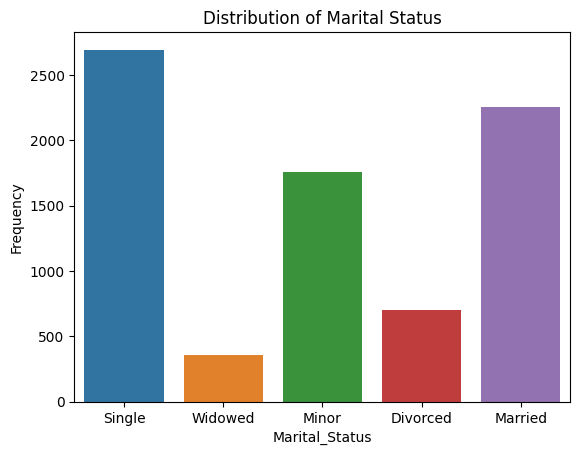

In [84]:
#univariate plot of Marital_Status
sbn.countplot(data = census_df, x = "Marital_Status"); #plot countplot
plt.title("Distribution of Marital Status") #set title
plt.xlabel("Marital_Status") #set xlabel
plt.ylabel("Frequency") #set ylabel
plt.savefig('./MStatus.png') #save plot


#### Observations
- The highest occuring Marital_Status value is 'Single', followed by 'Married'. This implies that most of the population are Single.


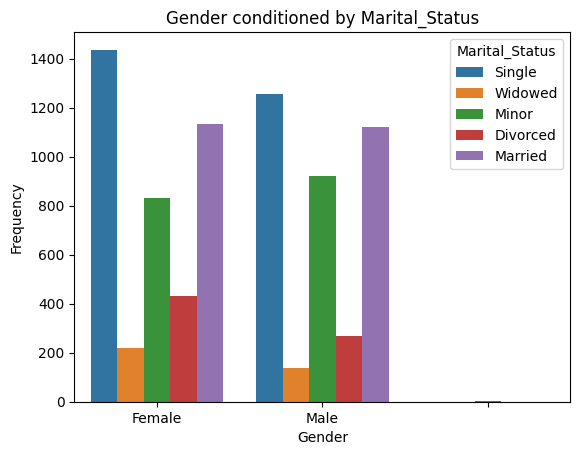

In [85]:
#bivariate plot of Gender and Marital_Status
#plot title and labels can be set using sbn or plt
sbn.countplot(x = census_df['Gender'], hue = census_df['Marital_Status']).set(ylabel= 'Frequency', title = 'Gender conditioned by Marital_Status');
plt.savefig('./MStatusGender.png') #save plot

#### Observations
- The distribution of Gender conditioned by Marital_Status is similar to the earlier plot as Single has the highest frequency in both genders
- The number of Married females and males are in close range.
- I also show the plot of Marital_Status conditioned by Gender for easier comparison


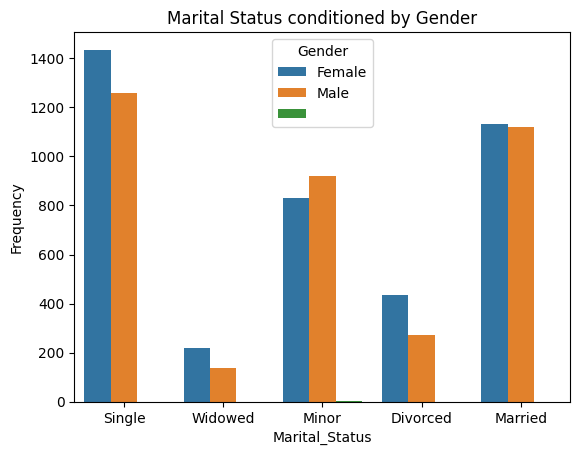

In [86]:
#bivariate plot of Marital_Status and Gender
sbn.countplot(x = census_df['Marital_Status'], hue = census_df['Gender']).set(ylabel='Frequency');
plt.title("Marital Status conditioned by Gender")
plt.savefig('./MGender.png')

#### Observations
- As noted earlier the number of Married males and females are in close range
- There are more female divorcees than male divorcees, same for Widowed.
- For Minors, there are more males than females in the dataset.

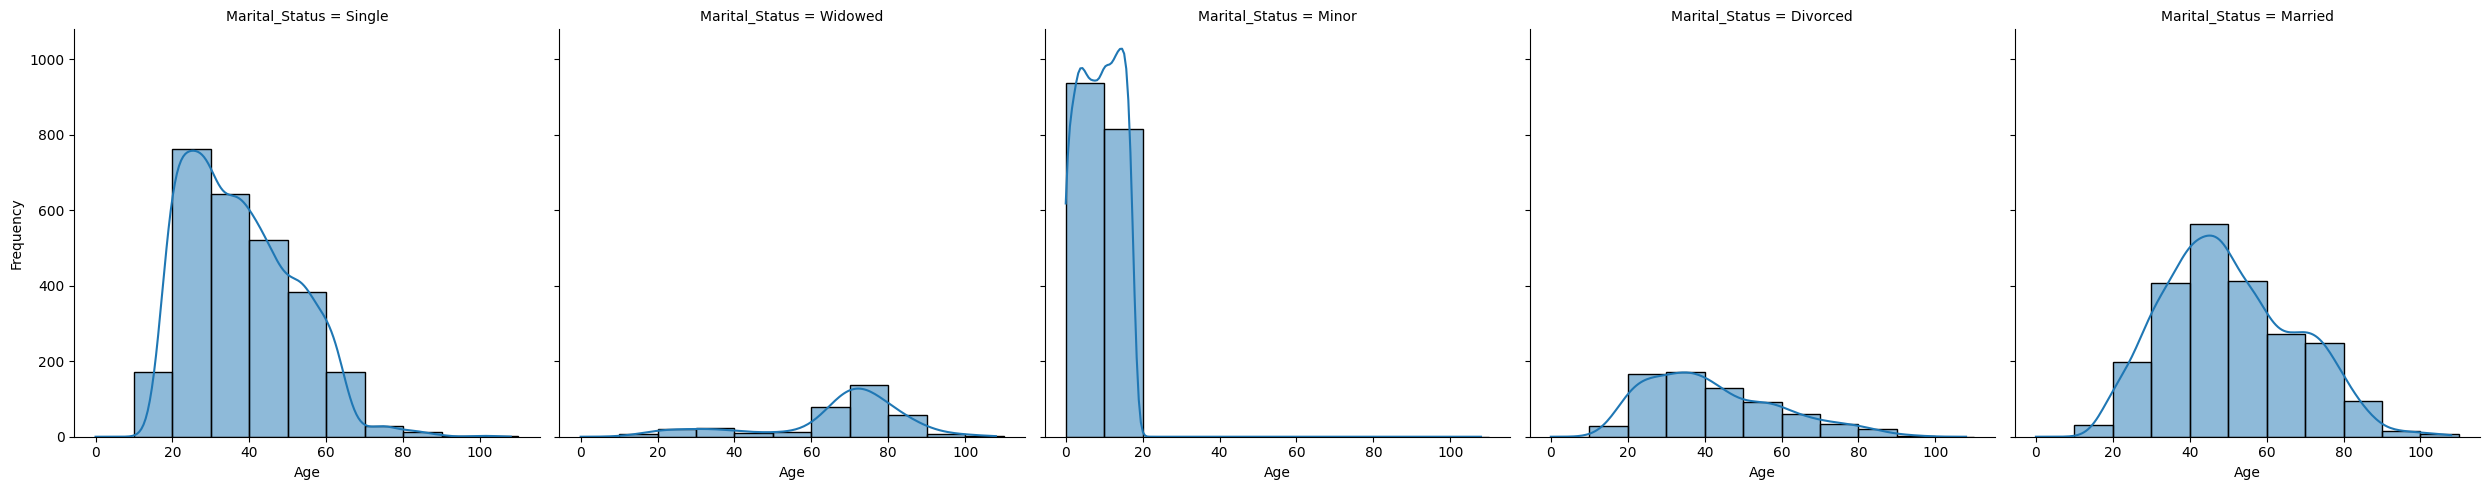

In [87]:
#bivariate plot of Age and Marital_Status
sbn.displot(x=census_df['Age'], col = census_df['Marital_Status'], binwidth = 10, kde = True).set(ylabel='Frequency');

#### Observations
- The age distribution of singles is dense between the ages of 20 and 60 which is the age range of most of the married people
- The age distribution of widowed is slightly left skewed and is dense between age 60 to 90
-  Minors are all below 18 and so is dense between 0 to 18
- The age distribution of Divorced persons is positively skewed, dense between 20 to 0 and peaks between ages 20 to 40
- The distributon of ages for married persons is normal and is dense between 20 to 80.
- The distribution is better depicted in the image below.

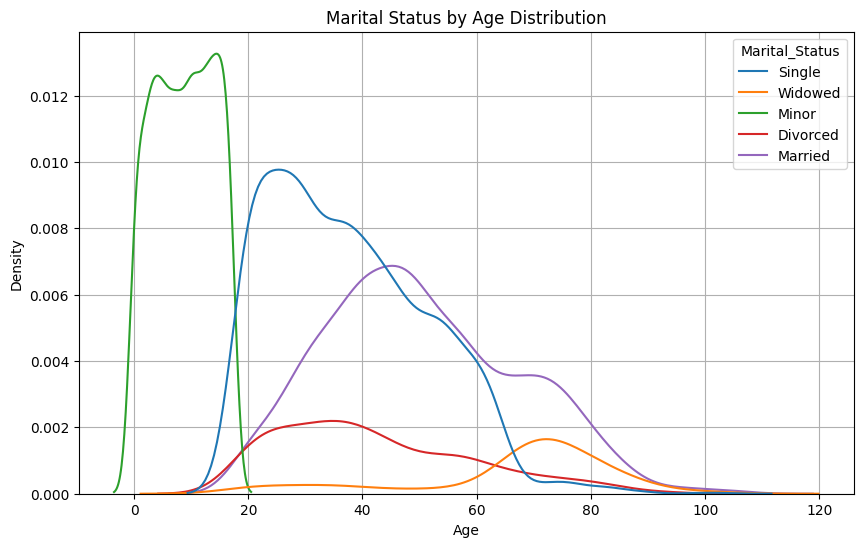

In [88]:
# Distribution of Marital status

plt.figure(figsize = (10,6)) #set image size
sbn.kdeplot(x='Age', data=census_df, hue = 'Marital_Status') #plot image
plt.title('Marital Status by Age Distribution') #set title
plt.grid() #include gridlines
plt.savefig('AgeMstat line.png') #save image
plt.show() #display plot


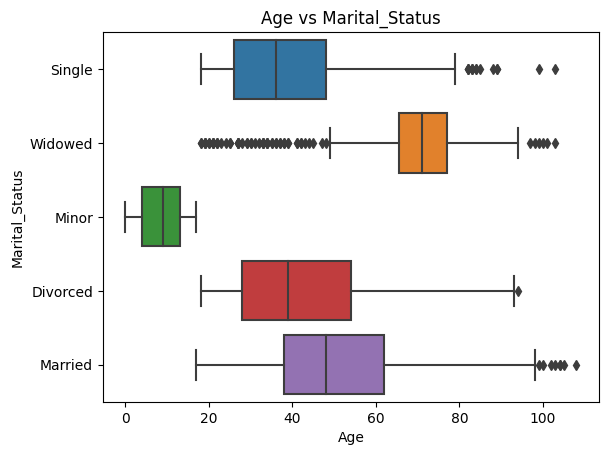

In [89]:
#boxplot showing Age distributon of Marital_Status
sbn.boxplot(data=census_df, x='Age', y='Marital_Status').set(title='Age vs Marital_Status') #plot image and set title
plt.savefig('./AgeMstat.png') #save image

#### Observations
- There are outliers in all the Marital_Status categories except Minor
- It is possible to be married, divorced or widowed at old age so these outliers may not require further checks
- It is also possible to widowed at any age but I will check those widowed at 18 and below to verify the data
- It is not impossible to be single at old age but we will just check these for consistency

In [90]:
#checking outliers
#checking data of single persons above 80
census_df[(census_df['Marital_Status'] == 'Single') & (census_df.Age > 80)]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
753,28,Murphy Harbors,Ross,Newman,89,Head,Single,Male,Retired Optometrist,None,Christian
1984,39,Jones Street,Deborah,Bond,89,Head,Single,Female,Retired Science writer,None,None
3790,33,St.Mary Field,Brett,Johnson,83,Head,Single,Male,Retired Air broker,None,Christian
4218,198,St.Mary Field,Charlie,Parry,88,Head,Single,Male,"Retired Engineer, site",None,Muslim
4437,2,Noble Drive,Geoffrey,Murray,82,Head,Single,Male,Retired Copy,None,Methodist
4760,50,Godfrey Dale,Edward,Hartley,84,Head,Single,Male,Retired Herpetologist,None,None
4802,80,Godfrey Dale,Brenda,Owen,82,Head,Single,Female,Retired Ecologist,None,Christian
5055,3,Ahmed Ville,Melissa,Warren,99,Head,Single,Female,"Retired Scientist, biomedical",None,Christian
5280,12,Salamander Pines,Mary,Craig,83,Head,Single,Female,Retired Interpreter,None,Christian
5348,55,Salamander Pines,Danielle,Evans,84,Head,Single,Female,Retired Sports development officer,None,None


In [91]:
#checking the odd row with unemployed as occupation
census_df.query('House_Number == 7 and Street =="Albion Tunnel"')

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
6328,7,Albion Tunnel,Conor,Hayes,82,Head,Single,Male,Unemployed,None,Methodist


In [92]:

#checking the data of young widows
census_df[(census_df['Marital_Status'] == 'Widowed') & (census_df.Age <= 18)]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
2491,30,Sunderland Road,Norman,Smith,18,Son,Widowed,Male,Student,None,Methodist
6440,1,Young Vista,Mitchell,Baldwin,18,Son,Widowed,Male,Student,None,Methodist


In [93]:
#checking for married persons under 18
census_df[(census_df['Marital_Status'] == 'Married') & (census_df.Age < 18)]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
5501,7,Booth Street,Holly,Davies,17,Wife,Married,Female,Student,None,NaN


#### Observations
- All the single person above 80, except one, are retired and are most likely not lying about their ages.
- Checking the data of the single person who is unemployed shows he lives alone so he is most likely single
- it is possible to be widowed at 18 and the law at the time of this census allowed marriages as long as puberty has been attained so I will leave the data as it is

In [94]:
#checking the descriptive statistics of Marital_Status by Age
marital_stats = census_df.groupby('Marital_Status')['Age']
marital_stats.describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Divorced,703.0,42.098151,17.015253,18.0,28.0,39.0,54.0,94.0
Married,2250.0,50.331556,16.912753,17.0,38.0,48.0,62.0,108.0
Minor,1754.0,8.708096,5.204135,0.0,4.0,9.0,13.0,17.0
Single,2693.0,37.781285,13.930551,18.0,26.0,36.0,48.0,103.0
Widowed,355.0,66.738028,18.175279,18.0,65.5,71.0,77.0,103.0


In [95]:
#checking the most frequent Age per Marital_Status
marital_stats.apply(lambda x: x.mode()[0])


Marital_Status
Divorced    33
Married     46
Minor        3
Single      19
Widowed     72
Name: Age, dtype: int32

#### Observations
- With the above statistics, we can see the IQR of ages for each Marital_status category as well as their average ages and their mode.


### Gender

In [96]:
#I check the gender column and I see we have empty spaces
census_df['Gender'].unique()

array(['Female', 'Male', ' '], dtype=object)

In [97]:
#I check the count of the unique features and it is just one incidence of empty space
census_df['Gender'].value_counts()

Female    4050
Male      3704
             1
Name: Gender, dtype: int64

In [98]:
#checking null values
census_df.Gender.isna().any()

False

In [99]:
#I call up the data with the empty space to view the data
census_df[census_df['Gender'].str.isspace() == True]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
2421,8,Sunderland Road,Gerard,Mitchell,7,Son,Minor,,Student,None,NaN


#### Observations
- From the information above we can infer that Gerard Mitchell is male, based off his relationship to head of house

In [100]:
#I replace the empty space with Male
census_df.loc[2421, 'Gender'] = 'Male'

In [101]:
# then i run a check to confirm
census_df['Gender'].value_counts()

Female    4050
Male      3705
Name: Gender, dtype: int64

### Gender Visualisation

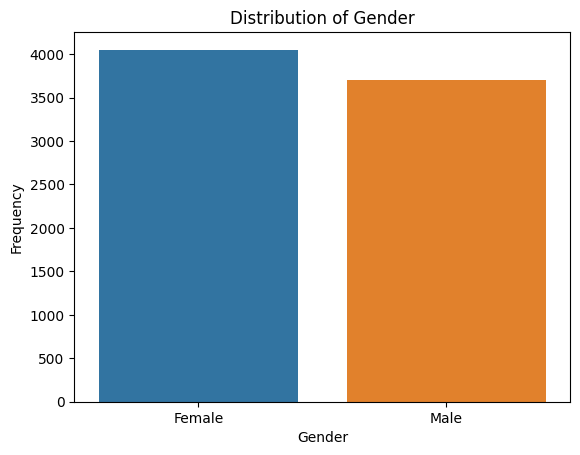

In [102]:
#univariate plot of the Gender column
sbn.countplot(x = census_df['Gender']).set(ylabel= 'Frequency'); #plot image
plt.title("Distribution of Gender") #set title
plt.savefig('./Gender.png') #save image

#### Observations
- There are more females than males in the dataset

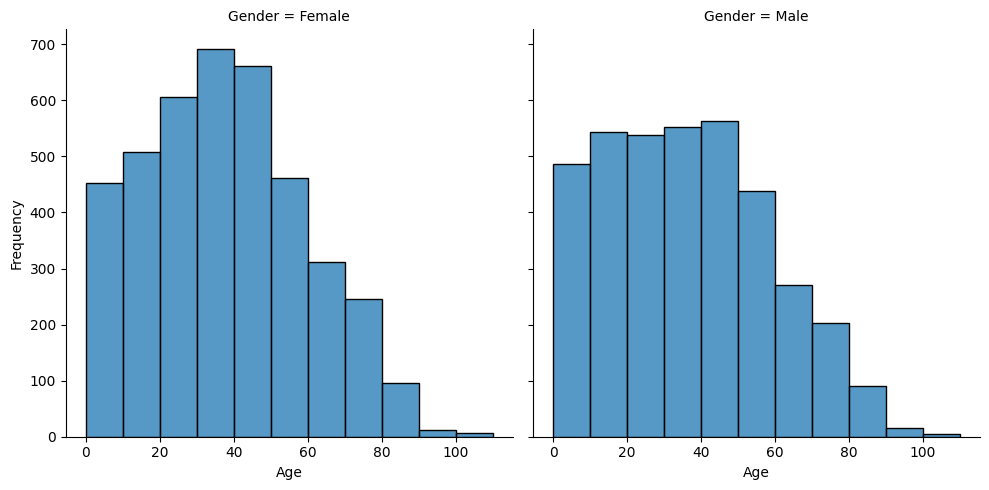

In [103]:
#bivariate plot showing distribution of Age per Gender 
sbn.displot(data = census_df, x = "Age",col = 'Gender', binwidth = 10).set(ylabel = "Frequency"); #plot image
plt.savefig('./GenderAge.png') #save image

In [104]:
#checking the descriptive statistics of Gender by Age
gender_stats = census_df.groupby('Gender')['Age']
gender_stats.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,4050.0,37.168395,21.452775,0.0,21.0,36.0,52.0,105.0
Male,3705.0,35.902834,22.063348,0.0,18.0,34.0,52.0,108.0


In [105]:
#checking the most frequent Age per gender_stats
gender_stats.apply(lambda x: x.mode()[0])


Gender
Female    42
Male      46
Name: Age, dtype: int32

#### Observations
- The IQR for females is between ages 21 and 52 while for males is between ages 18 and 52 which is similar but the count is significantly lower for males in this range than female as seen in the image
- The Age with highest is occurence is 42 for female and 46 for female 

### Occupation

In [106]:
#running a check on the occupation column
census_df['Occupation'].nunique()

1075

In [107]:
#check for null values
census_df.Occupation.isna().any()

False

In [108]:
#check for empty strings
census_df[census_df.Occupation.str.isspace() == True]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion


In [109]:
census_df['Occupation'].value_counts()

Student                             1378
Unemployed                           534
Child                                465
University Student                   442
PhD Student                           17
                                    ... 
Retired Manufacturing engineer         1
Retired Pilot, airline                 1
Retired Food technologist              1
Retired Retail manager                 1
Retired Magazine features editor       1
Name: Occupation, Length: 1075, dtype: int64

#### Observations
- There are no null values or empty spaces in this column
- Students represents the largest percentage of the town's population with a total number of 1378 
- This is followed by unemployed of 535 persons 
- There are 467 children and 443 university students in the town
- There are numerous types of occupation in my dataset which I am going to group to employed
- There is also a large number of retired persons which I will group to retired under the Occupation class

In [110]:
#checking the data of retired persons
census_df[(census_df.Occupation.str.startswith ('Retired'))]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion
1,2,Northumberland Drive,Sara,Williams,73,Head,Widowed,Female,"Retired Lecturer, further education",None,Christian
9,8,Northumberland Drive,Benjamin,Ferguson,89,Head,Widowed,Male,Retired Chemical engineer,None,Christian
23,15,Northumberland Drive,Toby,Archer,80,Head,Widowed,Male,Retired Geophysical data processor,None,Christian
24,16,Northumberland Drive,Daniel,Murray,74,Head,Widowed,Male,Retired Comptroller,None,Christian
27,18,Northumberland Drive,Amanda,Patel,69,Head,Widowed,Female,"Retired Administrator, local government",None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
7650,1,Spencer Abbey,Thomas,Young,81,Husband,Married,Male,"Retired Engineer, biomedical",None,Christian
7654,1,Peninsula Stronghold,Valerie,Turnbull,69,Head,Married,Female,Retired Osteopath,None,Christian
7655,1,Peninsula Stronghold,Roger,Turnbull,71,Husband,Married,Male,Retired Magazine features editor,None,None
7705,1,Racoon Abbey,Diana,Sharpe,69,Head,Married,Female,"Retired Civil engineer, contracting",None,Christian


In [111]:
#Checking the age of the youngest retired person

# filter the DataFrame to include only retired people
retired_df = census_df[census_df.Occupation.str.startswith('Retired')] 

# find the minimum age among the retired people
print(f'The minimum age of retired persons in my dataset is {retired_df.Age.min()}')
print(f'There are {len(retired_df)} retired persons in the town') 

The minimum age of retired persons in my dataset is 68
There are 737 retired persons in the town


In [112]:
# Define a function to map each occupation to a class
def classify_occupation(occupation):
    occupation_words = occupation.split() # Split the occupation string into a list of words
    first_word = occupation_words[0] # Get the first word
    if first_word in ['PhD', 'University']: #categorise university students and PhD students as university students
        return 'University Student'
    elif first_word == 'Retired':
        return 'Retired'
    elif occupation == 'Unemployed':
        return 'Unemployed'
    elif occupation == 'Student':
        return 'Student'
    elif occupation == 'Child':
        return 'Child'
    else:
        return 'Employed' #if not in any of the previous classes, return as employed

# Create a new column called "Occupation Class" and apply the function based on the values in the "Occupation" column
census_df['Occupation_Class'] = census_df['Occupation'].apply(classify_occupation)


In [113]:
#check value counts
census_df['Occupation_Class'].value_counts()

Employed              4182
Student               1378
Retired                737
Unemployed             534
Child                  465
University Student     459
Name: Occupation_Class, dtype: int64

### Occupation Visualisation

In [114]:
#check top 7 occupation
top7_occupation = census_df["Occupation"].value_counts().head(7)
top7_occupation

Student                          1378
Unemployed                        534
Child                             465
University Student                442
PhD Student                        17
Speech and language therapist      16
Facilities manager                 14
Name: Occupation, dtype: int64

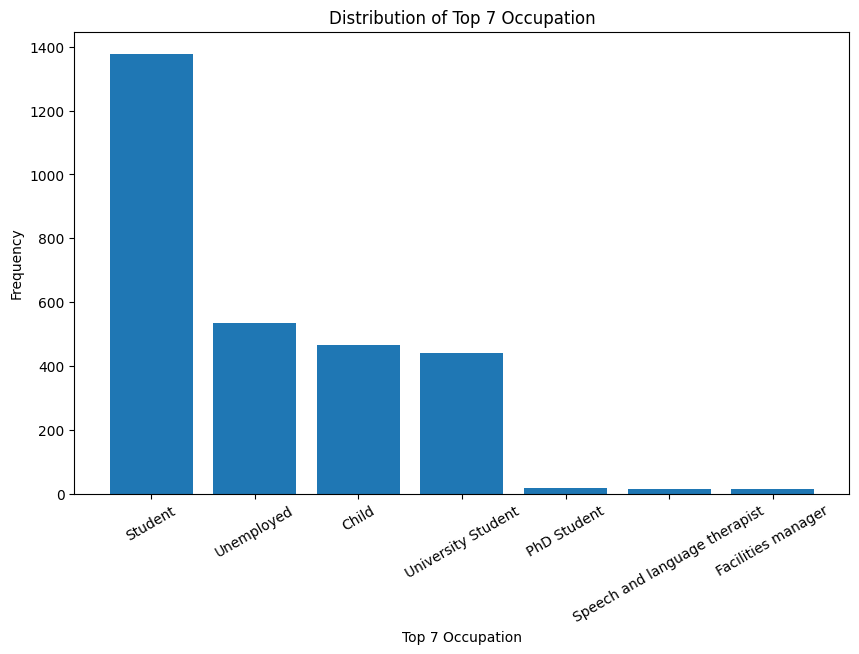

In [115]:
#univariate plot of top 7 Occupation
plt.figure(figsize = (10,6)) #set image size
plt.bar(top7_occupation.index, top7_occupation.values); #plot image in the variable using index and count as x and y axis
plt.title('Distribution of Top 7 Occupation') #set title
plt.xlabel('Top 7 Occupation') #set xlabel
plt.ylabel('Frequency') #set ylabel
plt.xticks(rotation=30) #rotate xticks axis for readability
plt.savefig('Common Occupation.png') #save image

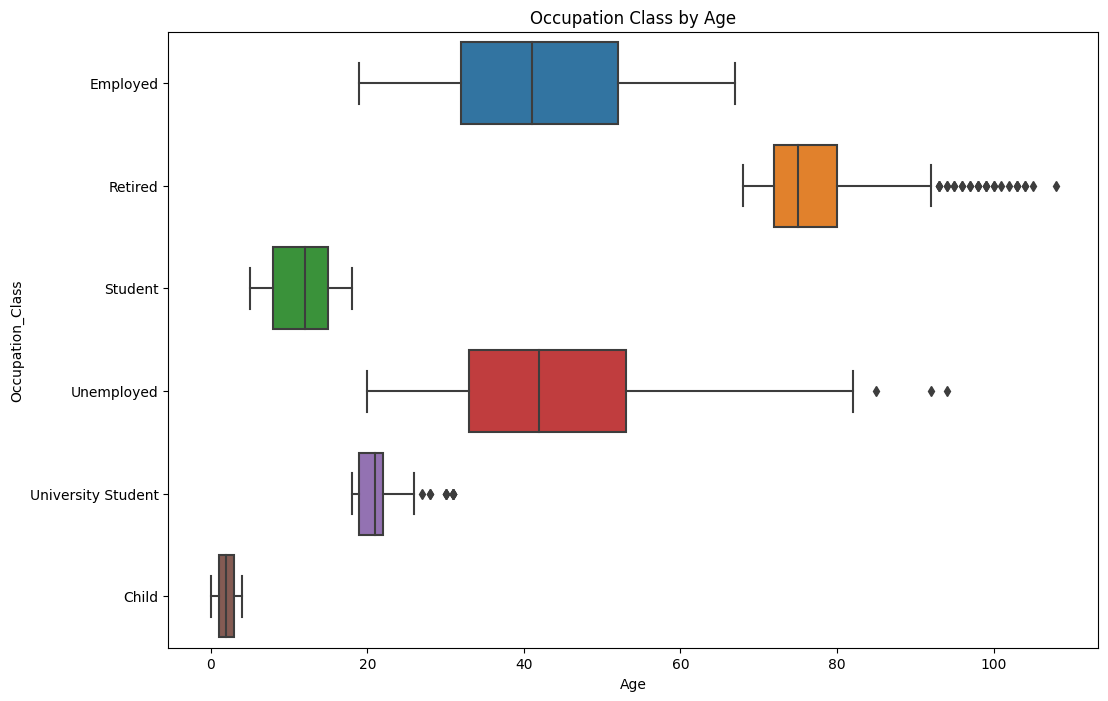

In [116]:
#Boxplot of Occupation_Class
plt.figure(figsize=(12,8)) #set figure image
sbn.boxplot(data=census_df, x='Age', y ='Occupation_Class').set(title='Occupation Class by Age'); #plot image and set title
plt.savefig('Occupation by Age.png') #save image

#### Observations
- Outliers are seen in Retired, Unemployed and University Students class
- Outliers in UNemployed with investigated while the others will be retained as they are not out of place

In [117]:
#checking the outlier of unemployed persons above 80
census_df.query('Age >= 80 and Occupation =="Unemployed"')

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
1053,13,Ellis Trail,Marian,Davis,82,Head,Widowed,Female,Unemployed,None,Christian,Unemployed
2007,1,Gwent Lodge,Timothy,Young,92,Head,Widowed,Male,Unemployed,None,Christian,Unemployed
5031,223,Godfrey Dale,Pauline,Whitehead,80,Head,Widowed,Female,Unemployed,None,None,Unemployed
5331,44,Salamander Pines,Shaun,Fletcher,94,Head,Married,Male,Unemployed,None,Catholic,Unemployed
6328,7,Albion Tunnel,Conor,Hayes,82,Head,Single,Male,Unemployed,None,Methodist,Unemployed
6729,36,Wilson Avenue,Tracey,Marshall,85,Head,Divorced,Female,Unemployed,None,Christian,Unemployed


In [118]:
#Convert the unemployed category thats above the DRA of 65 to retired 
census_df['Occupation_Class'] = np.where((census_df['Age'] >= 65) & (census_df['Occupation'] == 'Unemployed'), 'Retired',
                                         census_df['Occupation_Class'])

In [119]:
#Sanity check
census_df.query('Age >= 65 and Occupation =="Unemployed"')

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
75,5,Ricehall Avenue,Jacqueline,Peacock,74,Head,Divorced,Female,Unemployed,None,None,Retired
582,23,Stoke Garden,Fiona,Hamilton,70,Wife,Married,Female,Unemployed,None,None,Retired
842,3,Clarke Parkway,Lindsey,Jackson,68,Head,Divorced,Female,Unemployed,None,Methodist,Retired
901,22,Glasgow Spurs,Diana,Hyde,78,Head,Married,Female,Unemployed,None,None,Retired
953,50,Glasgow Spurs,Rita,Fisher,75,Head,Widowed,Female,Unemployed,None,Christian,Retired
1053,13,Ellis Trail,Marian,Davis,82,Head,Widowed,Female,Unemployed,None,Christian,Retired
1120,21,Bennett Plain,Jodie,Allen,75,Head,Widowed,Female,Unemployed,None,Christian,Retired
1295,8,Wales Islands,Richard,Hughes,66,Head,Widowed,Male,Unemployed,None,Christian,Retired
1310,12,Wales Islands,Aimee,Kirk,76,Head,Widowed,Female,Unemployed,None,None,Retired
1350,23,Wales Islands,Richard,Talbot,67,Head,Widowed,Male,Unemployed,None,Christian,Retired


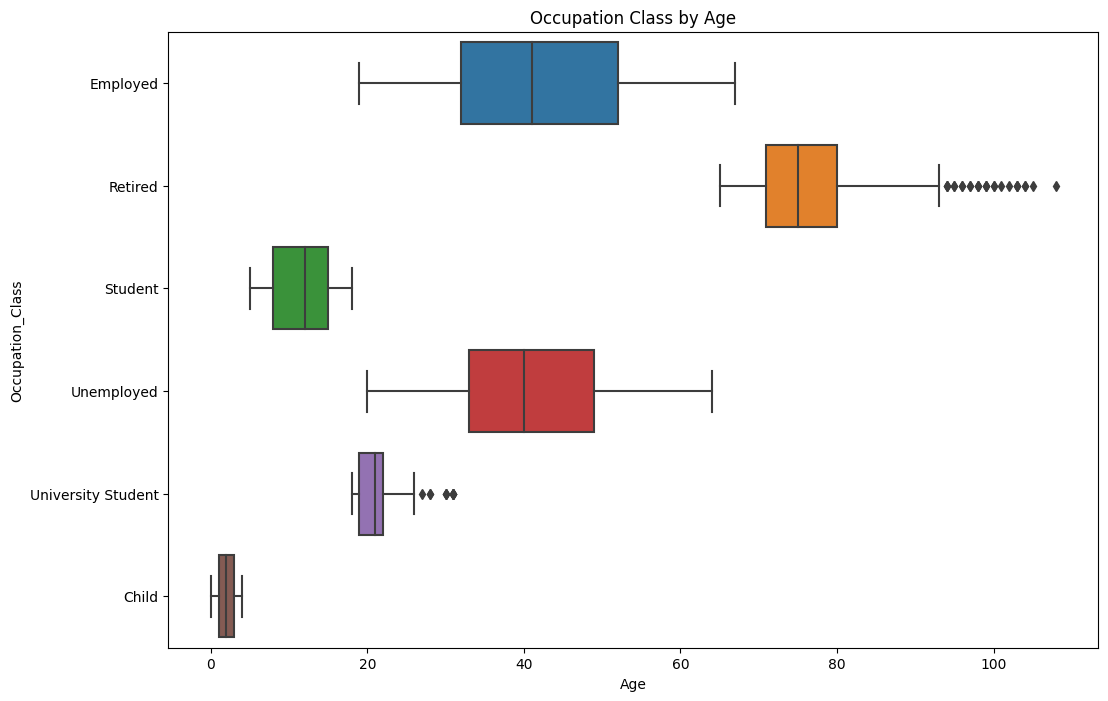

In [120]:
#check new boxplot
plt.figure(figsize=(12,8)) #set image size
sbn.boxplot(data=census_df, x='Age', y ='Occupation_Class').set(title='Occupation Class by Age'); #plot image and set title
plt.savefig('Occupation Class by Age.png') #save image

In [121]:
#statistics of Occupation_Class by Age
occupation_stats = census_df.groupby('Occupation_Class')['Age'].describe()
occupation_stats

,count,mean,std,min,25%,50%,75%,max
Occupation_Class,,,,,,,,
Child,465.0,2.023656,1.437445,0.0,1.0,2.0,3.0,4.0
Employed,4182.0,42.322095,12.080563,19.0,32.0,41.0,52.0,67.0
Retired,793.0,76.366961,7.213572,65.0,71.0,75.0,80.0,108.0
Student,1378.0,11.563135,4.012961,5.0,8.0,12.0,15.0,18.0
Unemployed,478.0,41.085774,10.888754,20.0,33.0,40.0,49.0,64.0
University Student,459.0,20.671024,1.963268,18.0,19.0,21.0,22.0,31.0


In [122]:
# Group the data by occupation_class and calculate the mode age for each group
occupation_mode = census_df.groupby('Occupation_Class')['Age'].apply(lambda x: x.mode()[0])

# Print the results
print(occupation_mode)


Occupation_Class
Child                  3
Employed              37
Retired               72
Student               15
Unemployed            33
University Student    19
Name: Age, dtype: int32


#### Observations
- The outliers in Unemployed class have been handled
- Average age of unemployed and employed persons are 41 and 42 respectively
- IQR of employed persons is between ages 32 to 52, similar to unemployed persons at ages 33 to 49

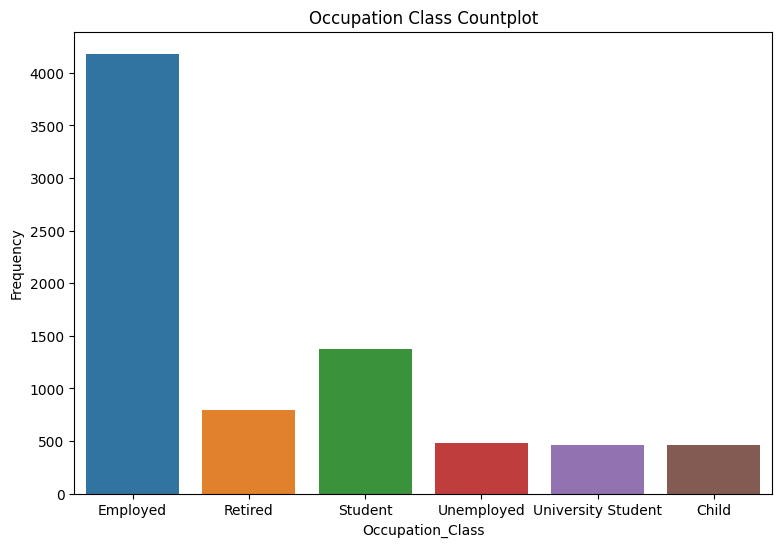

In [123]:
#univariate plot of Occupation_Class
plt.figure(figsize=(9,6)) #set image size
sbn.countplot(x = census_df['Occupation_Class']).set(ylabel= 'Frequency', title = 'Occupation Class Countplot'); #plot image and set title
plt.savefig('Occupation Class Countplot.png') #save image

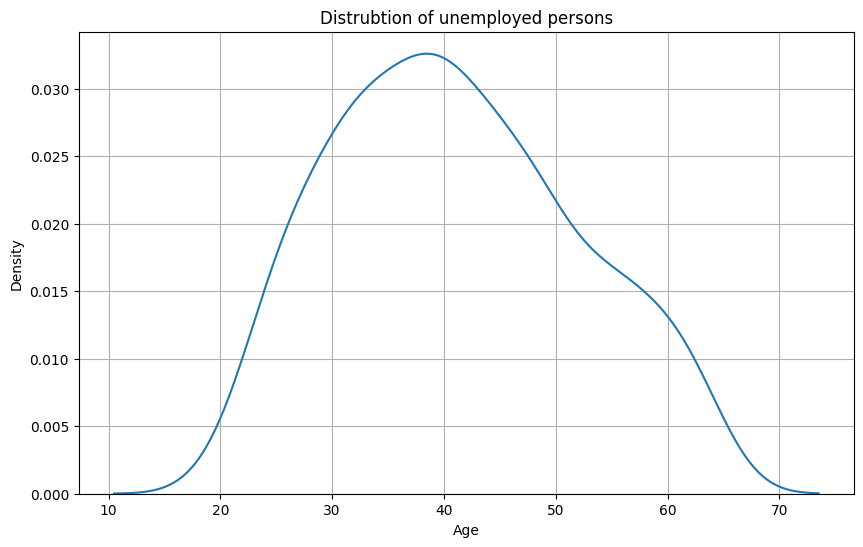

In [124]:
# Checking the distribution of divorce across the age range  
plt.figure(figsize = (10,6)) #set figure size
sbn.kdeplot(x='Age', data = census_df[census_df['Occupation_Class']=='Unemployed']).set_title('Distrubtion of unemployed persons'); #plot image and set title
plt.grid() #include gridlines
plt.savefig('unemployed line plot.png') #save figure

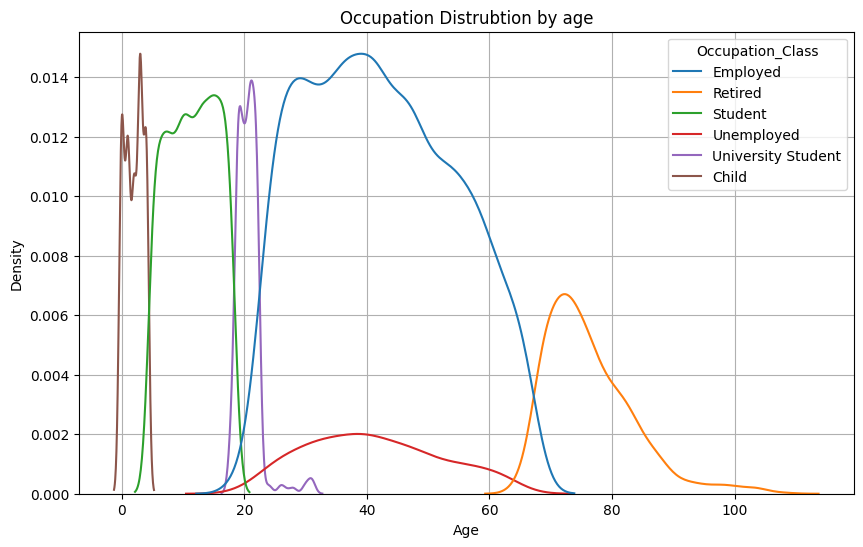

In [125]:
#bivariate plot showing distribution of age for different occupation classes. 
plt.figure(figsize = (10,6)) #set image size
sbn.kdeplot(x='Age', data=census_df, hue = 'Occupation_Class').set_title('Occupation Distrubtion by age') #plot image & set title

plt.grid() #include gridlines
plt.savefig('Occ class by age.png') #save image
plt.show() #display image

#### Observations
- As seen in the count plot, employed persons have the highest frequency, followed by Students with a huge difference
- The plot also shows a significant difference between Students and University Students, which may be interpreted to mean that a lot of students migrate out of town after then age of 18
- The distribution of unemployed persons is normal
- This pales in comparison to the denseness in employed distribution due to the count of each class but both distributions are normal
- The distribution of Retired persons is positive and dense between ages 70 to 80

### Calculating Unemployment Rate

In [126]:
# Grab the number of employed individuals in the dataset
employed_pop = census_df['Occupation_Class'].value_counts()[0]
print(f"{employed_pop} of the population are employed")

# Grab the number of unemployed individuals in the dataset
unemployed_pop = census_df['Occupation_Class'].value_counts()[3]
print(f"{unemployed_pop} of the population are unemployed")

# Calculate economically active population in the dataset
active_pop = employed_pop + unemployed_pop
print(f"The economically active population is {active_pop}")

# Calculate the unemployment rate
unemployment_rate = unemployed_pop / active_pop * 100
print(f"The unemployment rate is {unemployment_rate:.2f}%")

4182 of the population are employed
478 of the population are unemployed
The economically active population is 4660
The unemployment rate is 10.26%


### Infirmity

In [127]:
#checking unique values
census_df['Infirmity'].unique()

array(['None', 'Disabled', 'Deaf', 'Unknown Infection', ' ',
       'Physical Disability', 'Blind', 'Mental Disability'], dtype=object)

In [128]:
#check value counts
census_df['Infirmity'].value_counts()

None                   7687
Physical Disability      18
Disabled                 10
Deaf                      9
Unknown Infection         9
Mental Disability         8
                          7
Blind                     7
Name: Infirmity, dtype: int64

In [129]:
#check null values
census_df['Infirmity'].isnull().any()

False

#### Observations
- There are no NaN values in the infirmity column but we have 7 instances of empty strings which is seen below

In [130]:
#checking the data with empty strings
census_df[census_df['Infirmity'].str.isspace() == True]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
322,17,Kaur Street,Michelle,Jones,41,Head,Divorced,Female,"Clinical scientist, histocompatibility and imm...",,Christian,Employed
1846,37,Haymarket Crescent,Marie,Gray,65,Wife,Married,Female,Unemployed,,None,Retired
2351,46,Henge Hollow,Damien,Davies,63,Partner,Single,Male,Records manager,,Christian,Employed
4578,38,Baker Via,Joan,Duffy,22,Head,Married,Female,University Student,,Sikh,University Student
4833,100,Godfrey Dale,Raymond,Coates,29,Son,Single,Male,Games developer,,None,Employed
6944,36,Coronationcrib Road,Darren,Greenwood,0,Son,Minor,Male,Child,,NaN,Child
7368,11,Solstice Drive,Donald,Morris,27,Lodger,Single,Male,Theme park manager,,Catholic,Employed


#### Observations 
- From the value count, most of the population are healthy so I am going to fill the empty strings with None which is the mode of infirmity in the town
- This decision is not expected to significantly impact the analysis since there are only 7 instances

In [131]:
#checking the mode of the column
census_df['Infirmity'].mode()

0    None
Name: Infirmity, dtype: object

In [132]:
# replace empty strings with null values in the "infirmity" column
census_df['Infirmity'].replace(' ', 'None', inplace=True)

In [133]:
#check the data to be sure they have been correctly filled and there are no empty strings left
census_df[census_df['Infirmity'].str.isspace() == True]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class


In [134]:
#checking the fractions of persons above 80

#Grab the number of persons that are 80 and above
aged_persons = len(census_df[census_df.Age >=80])

#Grab the total population count
total_pop = len(census_df)

#calculate the proportion of aged persons to total population
aged_proportion = (aged_persons/total_pop)*100

#print results
print(f'{aged_proportion:.2f}% of the population are above the age of 80')

2.88% of the population are above the age of 80


In [135]:
#checking the fractions of persons between 70 and 80

#Grab the number of persons that between 70 and 80 
aged2_persons = len(census_df[(census_df.Age >=70) & (census_df.Age <80)])

#Grab the total population count
total_pop = len(census_df)

#calculate the proportion of persons between 70 - 80 to total population
aged2_proportion = (aged2_persons/total_pop)*100

#print result
print(f'{aged2_proportion:.2f}% of the population are between ages 70 t0 80')

5.78% of the population are between ages 70 t0 80


### Infirmity Visualisation

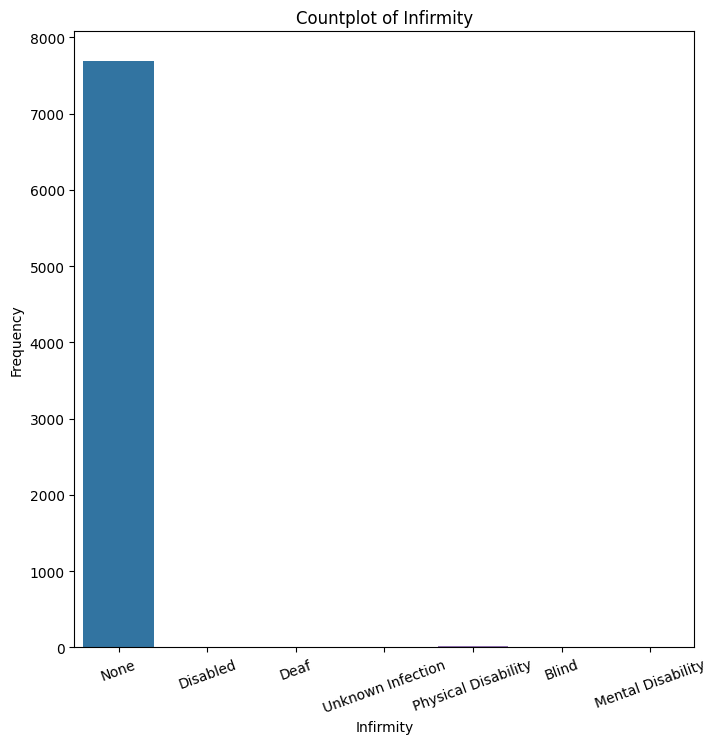

In [136]:
#uinvariate plot of Infirmity
plt.figure(figsize=(8,8)) #set figure size
sbn.countplot(x = census_df ["Infirmity"]).set(ylabel = 'Frequency'); #plot image 
plt.title('Countplot of Infirmity')#set title
plt.xticks(rotation=20) #rotate xticks axis labels to avoid clustering
plt.savefig('Countplot of Infirmity.png') #save image
plt.show() #display image

#### Observations
- The population is relatively healthy

### Religion

In [137]:
#check unique values in Religion
census_df['Religion'].unique()

array(['Catholic', 'Christian', 'None', nan, 'Muslim', 'Methodist',
       'Sikh', 'Jewish', 'Orthodoxy', 'Quaker', 'Nope', 'Agnostic',
       'Sith', 'Bahai', 'Pagan'], dtype=object)

In [138]:
#check value counts
census_df['Religion'].value_counts()

None         2608
Christian    1834
Catholic      769
Methodist     547
Muslim        103
Sikh           37
Jewish         30
Nope            5
Quaker          4
Orthodoxy       1
Agnostic        1
Sith            1
Bahai           1
Pagan           1
Name: Religion, dtype: int64

In [139]:
#changing Nope, Agnostic and Sith values to None
census_df['Religion'] = census_df['Religion'].replace(['Nope', 'Agnostic', 'Sith'], 'None')

In [140]:
#check if any null values
census_df['Religion'].isna().sum()

1813

In [141]:
#checking details of data with null values
census_df[census_df['Religion'].isna()]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
5,5,Northumberland Drive,Aaron,Connolly,13,Son,Minor,Male,Student,None,NaN,Student
21,14,Northumberland Drive,Marilyn,Fitzgerald,13,Daughter,Minor,Female,Student,None,NaN,Student
22,14,Northumberland Drive,Craig,Fitzgerald,11,Son,Minor,Male,Student,None,NaN,Student
44,27,Northumberland Drive,Iain,Naylor,18,Head,Divorced,Male,Student,None,NaN,Student
46,28,Northumberland Drive,Katie,Gill,8,Daughter,Minor,Female,Student,None,NaN,Student
...,...,...,...,...,...,...,...,...,...,...,...,...
7744,1,Waterloo Granary,Aaron,Lawrence,16,Son,Minor,Male,Student,None,NaN,Student
7746,1,Black House,Trevor,Patel,13,Son,Minor,Male,Student,None,NaN,Student
7747,1,Black House,Leigh,Patel,11,Son,Minor,Male,Student,None,NaN,Student
7748,1,Black House,David,Patel,9,Son,Minor,Male,Student,None,NaN,Student


In [142]:
#checking the religion of minors
if census_df[census_df['Age'] < 18]['Religion'].isna().all():
    print('All values in the "Religion" column of minors are NaN')
else:
    print('Some values in the "Religion" column of minors are not NaN')


All values in the "Religion" column of minors are NaN


In [143]:
#fill null values in minors' religion with undeclared
census_df.loc[census_df['Age'] < 18, 'Religion'] = census_df.loc[census_df['Age'] < 18, 'Religion'].fillna('Undeclared')


#### Resolving Null values for adults

In [144]:
#checking the number of adults with null in religion
print(len(census_df[(census_df.Religion.isna()) & (census_df.Age >= 18)]))

58


In [145]:
#checking details of null values for adults and sorting by Household to view couples easily 
census_df[(census_df.Religion.isna()) & (census_df.Age >= 18)].sort_values(by= ['House_Number', 'Street'])

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
4473,1,Baker Via,Stacey,Scott,18,Head,Married,Female,Student,None,NaN,Student
4474,1,Baker Via,Billy,Scott,19,Husband,Married,Male,University Student,None,NaN,University Student
1058,1,Bennett Plain,Brenda,Bentley,18,Lodger,Single,Female,Student,None,NaN,Student
5129,1,Corporation Lane,Brandon,Jarvis,18,Head,Married,Male,Student,None,NaN,Student
7676,1,Hedgehog Palace,Lucy,Rogers,20,None,Single,Female,University Student,None,NaN,University Student
6120,5,Whiterush Avenue,Judith,Pearce-Baker,18,Head,Married,Female,Student,None,NaN,Student
6121,5,Whiterush Avenue,Victor,Pearce-Baker,21,Husband,Married,Male,University Student,None,NaN,University Student
5816,6,Burns Avenue,Anne,Hill,18,None,Single,Female,Student,None,NaN,Student
6125,8,Whiterush Avenue,Colin,O'Neill,18,Head,Single,Male,Student,None,NaN,Student
727,10,Murphy Harbors,Suzanne,Johnson,18,Head,Single,Female,Student,None,NaN,Student


In [146]:
#checking the occupation of those with NaN Religion
census_df[census_df.Religion.isna()]['Occupation'].value_counts()

Student                   45
University Student        12
Applications developer     1
Name: Occupation, dtype: int64

In [147]:
#checking the household of the non-student
census_df[(census_df['House_Number'] == 192) & (census_df['Street'] == 'Godfrey Dale') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
4983,192,Godfrey Dale,Jade,West,18,Head,Married,Female,Student,None,NaN,Student
4984,192,Godfrey Dale,Raymond,Coleman,22,Husband,Married,Male,Applications developer,None,NaN,Employed


In [148]:
#checking the marital status of those with null value
census_df[(census_df['Age'] >= 18) &  (census_df.Religion.isnull())]['Marital_Status'].value_counts()

Single      38
Married     15
Divorced     5
Name: Marital_Status, dtype: int64

#### Checking the Marital Status of the three persons whose spouses religion are not null

In [149]:
census_df[(census_df['House_Number'] == 1) & (census_df['Street'] == 'Corporation Lane') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
5129,1,Corporation Lane,Brandon,Jarvis,18,Head,Married,Male,Student,None,NaN,Student
5130,1,Corporation Lane,Katherine,Jarvis,19,Wife,Married,Female,"Psychologist, sport and exercise",None,None,Employed


In [150]:
census_df[(census_df['House_Number'] == 78) & (census_df['Street'] == 'Cougar Branch') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
3033,78,Cougar Branch,Neil,Allen,18,Head,Married,Male,Student,None,NaN,Student
3034,78,Cougar Branch,Abigail,Allen,19,Wife,Married,Female,Patent examiner,None,None,Employed


In [151]:
census_df[(census_df['House_Number'] == 45) & (census_df['Street'] == 'Gardner Manor') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
4426,45,Gardner Manor,Guy,Metcalfe,18,Head,Married,Male,Student,None,NaN,Student
4427,45,Gardner Manor,Rachel,Metcalfe,19,Wife,Married,Female,University Student,None,None,University Student


#### Checking the household of the five that are divorced

In [152]:
census_df[(census_df['House_Number'] == 27) & (census_df['Street'] == 'Northumberland Drive') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
44,27,Northumberland Drive,Iain,Naylor,18,Head,Divorced,Male,Student,None,NaN,Student


In [153]:
census_df[(census_df['House_Number'] == 16) & (census_df['Street'] == 'Keeper Mews') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
7142,16,Keeper Mews,Dawn,Hart,18,Head,Divorced,Female,Student,None,NaN,Student


In [154]:
census_df[(census_df['House_Number'] == 28) & (census_df['Street'] == 'Albion Tunnel') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
6364,28,Albion Tunnel,Alexandra,Edwards,18,Head,Divorced,Female,Student,None,NaN,Student


In [155]:
census_df[(census_df['House_Number'] == 99) & (census_df['Street'] == 'Cougar Branch') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
3084,99,Cougar Branch,Julian,Franklin,18,Head,Divorced,Male,Student,None,NaN,Student


In [156]:
census_df[(census_df['House_Number'] == 23) & (census_df['Street'] == 'Wallis Avenue') ]

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
6211,23,Wallis Avenue,Natalie,Marshall,35,Head,Single,Female,Pharmacologist,None,None,Employed
6212,23,Wallis Avenue,Joseph,Atkinson,34,Partner,Single,Male,Unemployed,None,None,Unemployed
6213,23,Wallis Avenue,Damien,Khan,22,Lodger,Divorced,Male,University Student,None,None,University Student
6214,23,Wallis Avenue,Sylvia,Payne,18,Lodger,Divorced,Female,Student,None,NaN,Student


In [157]:
#checking the religion most common to students
census_df[(census_df['Age'] >= 18) & (census_df['Occupation'].isin(['Student', 'University Student']))]['Religion'].mode()


0    None
Name: Religion, dtype: object

In [158]:
#fill the remaining nan values with None
census_df.loc[(census_df['Religion'].isnull()),:]=census_df.loc[(census_df['Religion'].isnull()),
                                                                :].fillna(value={'Religion':'None'})

#### Observations & Action
- There are 1813 null values in the religion column but no empty spaces
- Nope, Sith and Agnostic are converted to none (see report for reason)
- All minors have NaN as religion to this is filled with undeclared
- In the remaining null values, all, except one, of those with NaN value as religion are either students or university students
- The non-student is married to a student whose religion is NaN.
- Most of them are single and have no relationship with those that they live with, or they live alone.
- The spouses of the married ones have 'None' or 'NaN as the Religion while those with Partners also have NaN values
- The few divorced ones live alone or have no relationship with those that they live with
- Based on the above, I proceed to fill the remaining NaN values with None, being the mode Religion of Students and University Students. 
- They are only 58 which is less than 1% of my data and is not expected to have any significant effect on the overall analysis.

In [159]:
#check for null values
census_df['Religion'].isna().sum()

0

In [160]:
#check new value count
census_df['Religion'].value_counts()

None          2673
Christian     1834
Undeclared    1755
Catholic       769
Methodist      547
Muslim         103
Sikh            37
Jewish          30
Quaker           4
Orthodoxy        1
Bahai            1
Pagan            1
Name: Religion, dtype: int64

### Religion Visualisation

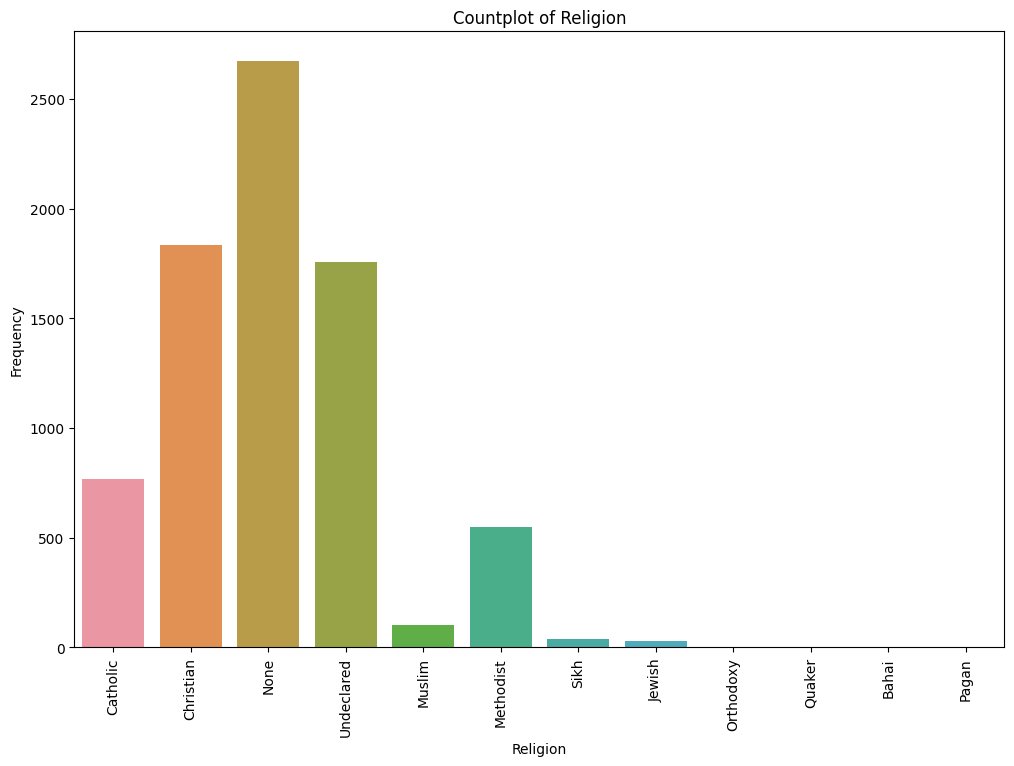

In [161]:
#uinvariate plot of Religion
plt.figure(figsize=(12,8)) #set figure size
sbn.countplot(x = census_df ["Religion"]).set(ylabel = 'Frequency'); #plot image 
plt.title('Countplot of Religion')#set title
plt.xticks(rotation=90) #rotate xticks axis labels to avoid clustering
plt.savefig('Countplot of Religion.png') #save image
plt.show() #display image

In [162]:
#statistics of Religion by Age
religion_stats = census_df.groupby('Religion')['Age']
religion_stats.describe()

,count,mean,std,min,25%,50%,75%,max
Religion,,,,,,,,
Bahai,1.0,44.000000,NaN,44.0,44.00,44.0,44.00,44.0
Catholic,769.0,42.230169,14.806753,18.0,32.00,41.0,49.00,99.0
Christian,1834.0,50.315703,18.011305,18.0,36.00,51.0,63.00,108.0
Jewish,30.0,41.733333,19.390601,18.0,25.25,39.0,53.75,84.0
Methodist,547.0,44.568556,17.281879,18.0,30.00,42.0,56.00,89.0
Muslim,103.0,35.106796,14.944284,19.0,25.00,31.0,39.00,88.0
None,2673.0,42.187804,17.318085,18.0,29.00,39.0,52.00,104.0
Orthodoxy,1.0,27.000000,NaN,27.0,27.00,27.0,27.00,27.0
Pagan,1.0,34.000000,NaN,34.0,34.00,34.0,34.00,34.0


In [163]:
#checking the percentage of population that are youths.
num_youngchristians = len (census_df[(census_df.Religion == 'Christian') & (census_df.Age >= 16) & (census_df.Age <= 29)])
num_christians = len(census_df[census_df.Religion == 'Christian'])

print(f'There are {num_youngchristians} young Christians in the town which is only {(num_youngchristians/num_christians)*100:\
.2f}%')

There are 292 young Christians in the town which is only 15.92%


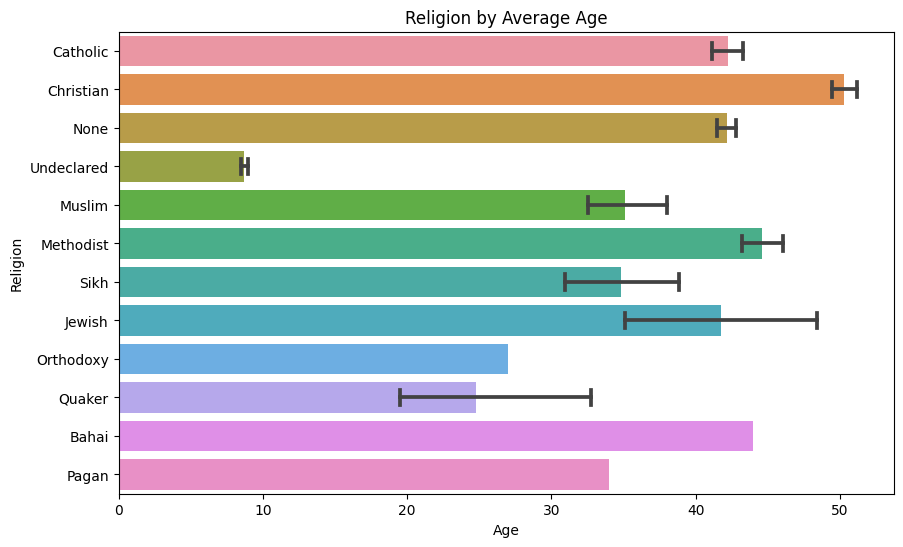

In [164]:
#whisker plot of religion by Age
plt.figure(figsize = (10,6))

sbn.barplot(
    data=census_df, x = "Age", y = 'Religion',capsize=.4, 
    linewidth=3).set(title = "Religion by Average Age");

#### Observations
- None has the highest frequency and this is followed by Christian
- The mean ages of Christian and Catholics are 50 and 42 respectively
- Detailed analysis in report

## Clean Data

In [165]:
#reset the index of my dataframe to replace the old index as we have dropped some data.
census_df = census_df.reset_index(drop = True)

In [166]:
#save clean data to csv
census_df.to_csv("Clean_Census17.csv", index=False)

In [167]:
#read in the cleaned csv file
cdf = pd.read_csv("Clean_Census17.csv")

In [168]:
#check data info
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7755 entries, 0 to 7754
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House_Number                   7755 non-null   int64 
 1   Street                         7755 non-null   object
 2   First_Name                     7755 non-null   object
 3   Surname                        7755 non-null   object
 4   Age                            7755 non-null   int64 
 5   Relationship_to_Head_of_House  7755 non-null   object
 6   Marital_Status                 7755 non-null   object
 7   Gender                         7755 non-null   object
 8   Occupation                     7755 non-null   object
 9   Infirmity                      7755 non-null   object
 10  Religion                       7755 non-null   object
 11  Occupation_Class               7755 non-null   object
dtypes: int64(2), object(10)
memory usage: 727.2+ KB


In [169]:
#check that there are no null values
cdf.isna().sum()

House_Number                     0
Street                           0
First_Name                       0
Surname                          0
Age                              0
Relationship_to_Head_of_House    0
Marital_Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
Occupation_Class                 0
dtype: int64

In [170]:
#check first five rows
cdf.head()

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class
0,1,Northumberland Drive,Susan,Jackson,35,Head,Single,Female,Ceramics designer,None,Catholic,Employed
1,2,Northumberland Drive,Sara,Williams,73,Head,Widowed,Female,"Retired Lecturer, further education",None,Christian,Retired
2,3,Northumberland Drive,Aimee,Adams,39,Head,Single,Female,"Nurse, adult",None,None,Employed
3,4,Northumberland Drive,Henry,Allen,56,Head,Single,Male,Dentist,None,None,Employed
4,5,Northumberland Drive,Jasmine,Connolly,45,Head,Single,Female,"Designer, textile",None,Catholic,Employed


## Population Pyramid

In [171]:
#putting ages into groups of 5 years interval
cdf['Age_Group'] = pd.cut(x=cdf['Age'], bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110])

In [172]:
#group the data by age_group and gender, then assign to a variable
cdfgroup = cdf.groupby(['Age_Group', 'Gender'])
cdfgroup

In [173]:
#convert cdfgroup into a dataframe with a count of each unique value in gender for every age group as a column
census_pop = cdfgroup.size().unstack()
census_pop

Gender,Female,Male
Age_Group,,
"(0, 5]",238,233
"(5, 10]",221,253
"(10, 15]",249,256
"(15, 20]",262,274
"(20, 25]",302,259
"(25, 30]",318,299
"(30, 35]",328,273
"(35, 40]",379,279
"(40, 45]",339,271


In [174]:
#assign female column to a variable 
female_cdf = census_pop['Female']
female_cdf

Age_Group
(0, 5]        238
(5, 10]       221
(10, 15]      249
(15, 20]      262
(20, 25]      302
(25, 30]      318
(30, 35]      328
(35, 40]      379
(40, 45]      339
(45, 50]      289
(50, 55]      241
(55, 60]      221
(60, 65]      157
(65, 70]      138
(70, 75]      138
(75, 80]       94
(80, 85]       58
(85, 90]       21
(90, 95]        7
(95, 100]       7
(100, 110]      4
Name: Female, dtype: int64

In [175]:
#change male count to negative numbers and assign to a variable 
male_cdf = census_pop['Male']* -1
male_cdf

Age_Group
(0, 5]       -233
(5, 10]      -253
(10, 15]     -256
(15, 20]     -274
(20, 25]     -259
(25, 30]     -299
(30, 35]     -273
(35, 40]     -279
(40, 45]     -271
(45, 50]     -273
(50, 55]     -230
(55, 60]     -201
(60, 65]     -136
(65, 70]     -113
(70, 75]     -124
(75, 80]      -82
(80, 85]      -46
(85, 90]      -26
(90, 95]       -8
(95, 100]      -5
(100, 110]     -5
Name: Male, dtype: int64

In [176]:
#convert these to a dataframe called cdf_age
cdf_age = pd.DataFrame({'Age':['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+'],
                'Male': male_cdf,
                'Female':female_cdf})
cdf_age

,Age,Male,Female
Age_Group,,,
"(0, 5]",0-4,-233,238
"(5, 10]",5-9,-253,221
"(10, 15]",10-14,-256,249
"(15, 20]",15-19,-274,262
"(20, 25]",20-24,-259,302
"(25, 30]",25-29,-299,318
"(30, 35]",30-34,-273,328
"(35, 40]",35-39,-279,379
"(40, 45]",40-44,-271,339


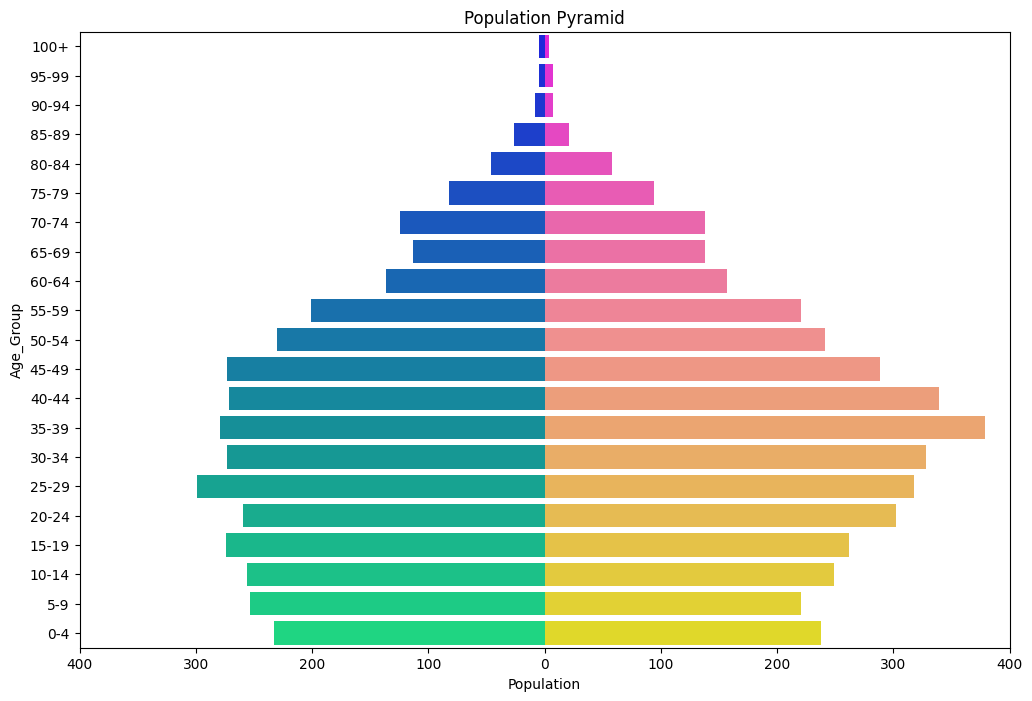

In [177]:
# plot population pyramid
plt.figure(figsize=(12, 8))

# Define order for plotting and assign to variable Age_band
Age_band = ['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', '60-64', '55-59', '50-54', '45-49',
            '40-44', '35-39', '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4']

# Create bar plot for male population by age_band
Pop_plot = sbn.barplot(x='Male', y='Age', data=cdf_age, palette=('winter'), order=Age_band, label='Male')

#bar plot for female population by age band
Pop_plot = sbn.barplot(x='Female', y='Age', data=cdf_age, palette=('spring'), order=Age_band, label='Female')

# Set plot labels and title
Pop_plot.set(xlabel='Population', ylabel='Age_Group', title='Population Pyramid')

# Set limits of x-axis range and set xticks labels to absolute
plt.xlim(-400, 400)
xticks = np.arange(-400, 500, 100)
plt.xticks(xticks, labels=np.abs(xticks))

# Save plot as image
plt.savefig('./poppyramid.png')


#### Observations
- The pyramid is mostly stable, declining for later years and suggesting that the population has a low life expectancy

## Checking Occupancy

In [178]:
#create a dataframe grouped by House Number and Street and count number of occupants in each house using size method
occupancy_df = cdf.groupby(['House_Number', 'Street']).size().reset_index(name='Occupants')
occupancy_df

,House_Number,Street,Occupants
0,1,Ahmed Ville,2
1,1,Albans Drive,1
2,1,Albion Tunnel,1
3,1,Appletree Plaza,2
4,1,August Vista,2
...,...,...,...
3001,233,St.Mary Field,3
3002,234,Godfrey Dale,1
3003,235,Godfrey Dale,1
3004,236,Godfrey Dale,2


In [179]:
# calculate statistics
print(occupancy_df['Occupants'].describe())
print()
print(f'There are {occupancy_df.Occupants.count()} households in the Population Census dataset')

count    3006.000000
mean        2.579840
std         1.557371
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        19.000000
Name: Occupants, dtype: float64

There are 3006 households in the Population Census dataset


In [180]:
# Compute the 75th percentile of the 'Occupants' column
occupants_75th = np.percentile(occupancy_df['Occupants'], 75)

# Compute and print the number of households in the filtered dataset
filtered_df = occupancy_df[occupancy_df['Occupants'] > occupants_75th]
print(f'{len(filtered_df)} households have more than 4 occupants')

# Compute and print the maximum number of occupants in a household
max_occupants = occupancy_df['Occupants'].max()
print(f'Only {len(occupancy_df[occupancy_df.Occupants == max_occupants])} household has 19 occupants')


338 households have more than 4 occupants
Only 1 household has 19 occupants


In [181]:
occupancy_df[occupancy_df['Occupants'] == 19]

,House_Number,Street,Occupants
71,1,Peninsula Stronghold,19


In [182]:
cdf.query('House_Number == 1 and Street =="Peninsula Stronghold"')

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class,Age_Group
7651,1,Peninsula Stronghold,Valerie,Turnbull,69,Head,Married,Female,Retired Osteopath,None,Christian,Retired,"(65, 70]"
7652,1,Peninsula Stronghold,Roger,Turnbull,71,Husband,Married,Male,Retired Magazine features editor,None,None,Retired,"(70, 75]"
7653,1,Peninsula Stronghold,Diana,Turnbull,41,Daughter,Single,Female,Unemployed,None,Christian,Unemployed,"(40, 45]"
7654,1,Peninsula Stronghold,Clare,Turnbull,37,Daughter,Divorced,Female,Chiropodist,None,None,Employed,"(35, 40]"
7655,1,Peninsula Stronghold,Keith,Turnbull,36,Son,Single,Male,Transport planner,None,Christian,Employed,"(35, 40]"
7656,1,Peninsula Stronghold,Leah,Turnbull,35,Daughter,Divorced,Female,Warden/ranger,None,Christian,Employed,"(30, 35]"
7657,1,Peninsula Stronghold,Garry,Turnbull,33,Son,Single,Male,"Buyer, retail",None,Christian,Employed,"(30, 35]"
7658,1,Peninsula Stronghold,Tony,Turnbull,30,Son,Single,Male,International aid/development worker,Deaf,None,Employed,"(25, 30]"
7659,1,Peninsula Stronghold,Scott,Turnbull,28,Son,Single,Male,Warden/ranger,None,Christian,Employed,"(25, 30]"
7660,1,Peninsula Stronghold,Jacob,Turnbull,27,Son,Single,Male,Archivist,None,Christian,Employed,"(25, 30]"


In [183]:
occupancy_df[occupancy_df['Occupants'] > 7]

,House_Number,Street,Occupants
24,1,Davis Longhouse,8
52,1,June Cottage,12
71,1,Peninsula Stronghold,19
74,1,Racoon Abbey,12
92,1,Wales Mission,9
98,1,Westminster Citadel,8
317,4,Goddard Meadows,12
364,4,Wales Mission,8
407,5,Goddard Meadows,12
495,6,Goddard Meadows,15


In [184]:
cdf.query('House_Number == 7 and Street =="Wales Mission"')

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class,Age_Group
2156,7,Wales Mission,Adrian,Armstrong,78,Head,Married,Male,"Retired Designer, exhibition/display",None,Christian,Retired,"(75, 80]"
2157,7,Wales Mission,Rachael,Armstrong,77,Wife,Married,Female,Retired Learning disability nurse,None,Christian,Retired,"(75, 80]"
2158,7,Wales Mission,Victoria,Armstrong,55,Daughter,Widowed,Female,Unemployed,None,None,Unemployed,"(50, 55]"
2159,7,Wales Mission,Wayne,Armstrong,54,Son,Divorced,Male,Production manager,None,None,Employed,"(50, 55]"
2160,7,Wales Mission,Jay,Armstrong,48,Son,Divorced,Male,Transport planner,None,None,Employed,"(45, 50]"
2161,7,Wales Mission,Michael,Armstrong,44,Son,Single,Male,Pathologist,None,Christian,Employed,"(40, 45]"
2162,7,Wales Mission,Pamela,Armstrong,42,Daughter,Divorced,Female,"Civil engineer, contracting",None,None,Employed,"(40, 45]"
2163,7,Wales Mission,Sian,Armstrong,39,Daughter,Divorced,Female,Patent examiner,None,None,Employed,"(35, 40]"
2164,7,Wales Mission,James,Armstrong,37,Son,Single,Male,Health and safety inspector,None,Christian,Employed,"(35, 40]"
2165,7,Wales Mission,Marc,Armstrong,33,Son,Divorced,Male,"Engineer, automotive",None,Christian,Employed,"(30, 35]"


In [185]:
cdf.query('House_Number == 6 and Street =="Goddard Meadows"')

,House_Number,Street,First_Name,Surname,Age,Relationship_to_Head_of_House,Marital_Status,Gender,Occupation,Infirmity,Religion,Occupation_Class,Age_Group
2613,6,Goddard Meadows,Leah,Pickering,83,Head,Married,Female,"Retired Runner, broadcasting/film/video",None,Christian,Retired,"(80, 85]"
2614,6,Goddard Meadows,Harry,Pickering,84,Husband,Married,Male,"Retired Presenter, broadcasting",None,None,Retired,"(80, 85]"
2615,6,Goddard Meadows,Michelle,Pickering,46,Daughter,Single,Female,Ophthalmologist,None,None,Employed,"(45, 50]"
2616,6,Goddard Meadows,Sarah,Pickering,46,Daughter,Single,Female,Company secretary,None,Christian,Employed,"(45, 50]"
2617,6,Goddard Meadows,Frederick,Pickering,45,Son,Single,Male,"Therapist, drama",None,Christian,Employed,"(40, 45]"
2618,6,Goddard Meadows,Eileen,Pickering,41,Daughter,Divorced,Female,International aid/development worker,None,None,Employed,"(40, 45]"
2619,6,Goddard Meadows,Chelsea,Pickering,39,Daughter,Single,Female,"Biochemist, clinical",None,Christian,Employed,"(35, 40]"
2620,6,Goddard Meadows,Maureen,Pickering,37,Daughter,Divorced,Female,Facilities manager,None,Christian,Employed,"(35, 40]"
2621,6,Goddard Meadows,Graeme,Pickering,35,Son,Single,Male,"Horticulturist, commercial",None,Christian,Employed,"(30, 35]"
2622,6,Goddard Meadows,Lauren,Pickering,30,Daughter,Single,Female,"Teacher, English as a foreign language",None,None,Employed,"(25, 30]"


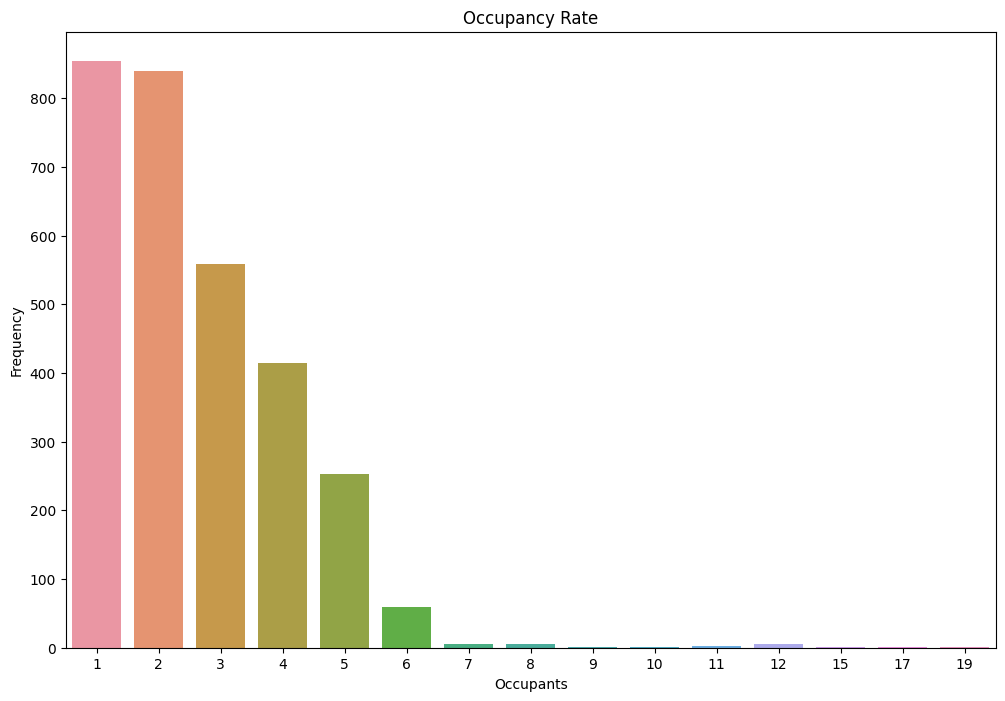

In [186]:
#univariate plot of occupancy rate
plt.figure(figsize=(12,8)) #set figure image
sbn.countplot(x = occupancy_df ["Occupants"]).set(title = 'Occupancy Rate', ylabel = 'Frequency') #plot image & set title
plt.savefig('Occupancy Rate.png') #save image
plt.show() #display image

#### Observations
- The mean occupancy is 3 while 75th percentile is 4, with 338 households out of 3006 having occupancy higher than than the 75th percentile
- The houses with the top 3 occupancy rates are all large families

### Divorce Rate

In [187]:
# Filter for data with a divorce status
divorce_df = cdf[(cdf['Marital_Status'] == 'Divorced')]

# Calculate the number of divorces
num_divorces = len(divorce_df)

# Calculate the population at risk of a divorce
pop_at_mrisk = len(cdf[(cdf['Marital_Status'] == 'Married')])

# Calculate the divorce rate
divorce_rate = (num_divorces / pop_at_mrisk) * 1000

# Print the divorce rate
print(f'The divorce rate in the population is {divorce_rate:.2f} per 1000 married individuals')


The divorce rate in the population is 312.44 per 1000 married individuals


### Marriage Rate

In [188]:
# filter for data with married status
num_marriages = len(cdf[cdf['Marital_Status'] == 'Married'])

#calculate total population
total_pop = len(cdf)

#calculate the marriage rate
marriage_rate = (num_marriages / total_pop) * 1000

#print the marriage rate
print(f'The marriage rate in the population is {marriage_rate:.2f} per 1000 individuals')


The marriage rate in the population is 290.14 per 1000 individuals


### Birth Rate & Fertility Rate

In [189]:
#calculate total population
total_pop = len(cdf)

#filter data for children aged 0 
num_births = len(cdf[cdf["Age"] == 0])

#filter data for mums of childbearing age
num_moms = len(cdf[(cdf["Gender"] == "Female") & (cdf["Age"] >=15) & (cdf["Age"] <=45)])

#calculate birth rate
birth_rate = (num_births/total_pop ) * 1000

#print birth rate
print(f'The birth rate in the population is {birth_rate:.2f} per 1000')

#calculate fertility rate
fertility_rate = (num_births/num_moms ) * 1000

#print fertility rate
print(f'Fertility rate is {fertility_rate:.2f} per 1000 females')

The birth rate in the population is 12.64 per 1000
Fertility rate is 49.45 per 1000 females


### Fertility Rate Trend & Evolving Fertility Rate
- The fertility rate trend is calculated over a 25 year period by 5 years, for our group of interest which is women between the childbearing age of 15 to 45 years
- The evolving fertility rate is calculated over the last 5 years

In [190]:
#Calculate fertility of children born now as a fraction of women between the ages of 15 to 19

#filter data of children aged 0
num_births = len(cdf[cdf["Age"] == 0])

#filter data of mums between 15 and 19
young_moms = len(cdf[(cdf["Gender"] == "Female") & (cdf["Age"] >=15) & (cdf["Age"] <=19)])

#calculate current fertility rate of women between 15 to 19 years
present_frate = (num_births/young_moms ) * 1000

#print current fertility rate
print(f' The current Fertility rate of females ages 15 to 19 is {present_frate:.2f} per 1000 \n')

 The current Fertility rate of females ages 15 to 19 is 367.04 per 1000 



In [191]:
#Calculate fertility of children born 5 years ago as a fraction of women between the ages of 20 to 24

#filter data of children aged 5
prev_births = len(cdf[cdf["Age"] == 5])

#filter data of mums between 20 and 24 
prev_moms = len(cdf[(cdf["Gender"] == "Female") & (cdf["Age"] >=20) & (cdf["Age"] <=24)])

#calculate fertility rate of children born 5 years ago, using women now between 20 to 24 years
prev_frate = (prev_births/prev_moms ) * 1000

#print current fertility rate
print(f' The Fertility rate for children born 5 years ago to females ages 20 to 24 is {prev_frate:.2f} per 1000 \n')


 The Fertility rate for children born 5 years ago to females ages 20 to 24 is 359.86 per 1000 



In [192]:
#Calculate fertility of children born 10 years ago as a fraction of women between the ages of 25 to 29

#filter data of children aged 10
prev10_births = len(cdf[cdf["Age"] == 10])

#filter data of mums between 25 and 29 
prev10_moms = len(cdf[(cdf["Gender"] == "Female") & (cdf["Age"] >=25) & (cdf["Age"] <=29)])

#calculate fertility rate of children born 10 years ago, using  women between 25 to 29 years
prev10_frate = (prev10_births/prev10_moms ) * 1000

#print previous fertility rate of 10 years ago
print(f' The Fertility rate for children born 10 years ago to females ages 30 to 34 is {prev10_frate:.2f} per 1000\n')


 The Fertility rate for children born 10 years ago to females ages 30 to 34 is 331.23 per 1000



In [193]:
#Calculate fertility of children born 15 years ago as a fraction of women between the ages of 30 to 34

#filter data of children aged 15
prev15_births = len(cdf[cdf["Age"] == 15])

#filter data of mums between 30 and 34 
prev15_moms = len(cdf[(cdf["Gender"] == "Female") & (cdf["Age"] >=30) & (cdf["Age"] <=34)])

#calculate fertility rate of children born 15 years ago, using women now between 30 to 34 years
prev15_frate = (prev15_births/prev15_moms ) * 1000

#print previous fertility rate
print(f' The Fertility rate for children born 15 years ago females ages 30 to 34 is {prev15_frate:.2f} per 1000\n')


 The Fertility rate for children born 15 years ago females ages 30 to 34 is 338.56 per 1000



In [194]:
#Calculate fertility of children born 20 years ago as a fraction of women between the ages of 35 to 39

#filter data of children aged 20
prev20_births = len(cdf[cdf["Age"] == 20])

#filter data of mums between 35 and 39
prev20_moms = len(cdf[(cdf["Gender"] == "Female") & (cdf["Age"] >=35) & (cdf["Age"] <=39)])

#calculate fertility rate of similar age group 20 years ago, using women now between 35 to 39 years
prev20_frate = (prev20_births/prev20_moms ) * 1000

#print previous fertility rate
print(f' The previous Fertility rate for children born 20 years ago females ages 35 to 39 is {prev20_frate:.2f} per 1000 \n')

 The previous Fertility rate for children born 20 years ago females ages 35 to 39 is 252.01 per 1000 



In [195]:
#Calculate fertility of children born 25 years ago as a fraction of women between the ages of 40 to 44

#filter data of children aged 25
prev25_births = len(cdf[cdf["Age"] == 25])

#filter data of mums between 40 and 44
prev25_moms = len(cdf[(cdf["Gender"] == "Female") & (cdf["Age"] >=40) & (cdf["Age"] <=44)])

#calculate fertility rate of similar age group 25 years ago, using women now between 40 to 44 years
prev25_frate = (prev25_births/prev25_moms ) * 1000

#print previous fertility rate
print(f' The previous Fertility rate for children born 25 years ago females ages 40 to 44 is {prev25_frate:.2f} per 1000 \n')

 The previous Fertility rate for children born 25 years ago females ages 40 to 44 is 325.00 per 1000 



In [196]:
#calculating evolving fertility rate
evolving_frate = present_frate-prev_frate
print(f' The evolving Fertility rate of the female population between 25 to 29 over the last 5 years is {evolving_frate:.2f} per 1000 \n')

 The evolving Fertility rate of the female population between 25 to 29 over the last 5 years is 7.18 per 1000 



In [197]:
#create lists of the fertility rates and corresponding periods
fertility_rates = [367.04, 359.86, 331.23, 338.56, 252.01, 325.00][::-1]
Period = ['Current', 'Last 5 years', 'Last 10 years', 'Last 15 years', 'Last 20 years', 'Last 25 years'][::-1]

#convert the list to a dataframe
birthrate_df = pd.DataFrame({'Fertility rate': fertility_rates, 'Period': Period})
birthrate_df

,Fertility rate,Period
0,325.00,Last 25 years
1,252.01,Last 20 years
2,338.56,Last 15 years
3,331.23,Last 10 years
4,359.86,Last 5 years
5,367.04,Current


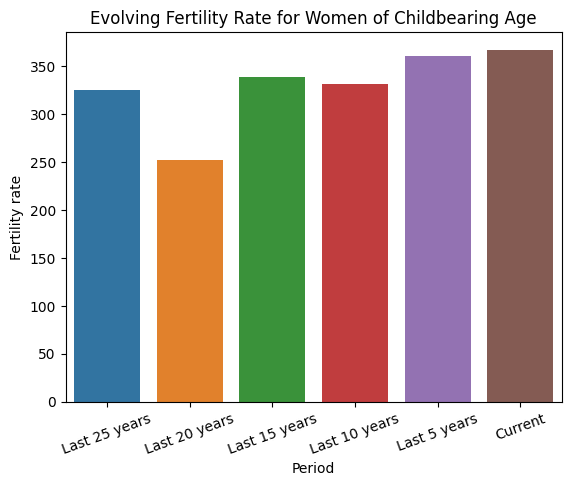

In [198]:
#create a plot of fertility rate trend
sbn.barplot(data = birthrate_df, x = 'Period', y = 'Fertility rate') #plot image
plt.xticks(rotation = 20) #rotate xticks label
plt.title('Evolving Fertility Rate for Women of Childbearing Age') #set title
plt.show() #display image

#### Observations
- The fertility trend show marginal increase year on year between the last 10 years and now
- The evolving rate shows and increase by 7.18 in the fertility rate between 5 years now

### Mortality Rate

In [199]:
#Group the census data by age group and count the number of individuals in each group
age_range_df = cdf.groupby(['Age_Group']).size().reset_index(name = 'AgeGrp_Count')

age_range_df

,Age_Group,AgeGrp_Count
0,"(0, 5]",471
1,"(5, 10]",474
2,"(10, 15]",505
3,"(15, 20]",536
4,"(20, 25]",561
5,"(25, 30]",617
6,"(30, 35]",601
7,"(35, 40]",658
8,"(40, 45]",610
9,"(45, 50]",562


In [200]:
#get difference in the count of age group
for i,row in age_range_df.iterrows(): #itearate over rows in age_range_df
    if i == 0: 
        continue #ignore index 0 i.e. headers
    else:
        age_range_df.at[i,'Difference'] = age_range_df.iloc[int(i)-1][1] - row['AgeGrp_Count'] #calculate difference

age_range_df

,Age_Group,AgeGrp_Count,Difference
0,"(0, 5]",471,NaN
1,"(5, 10]",474,-3.0
2,"(10, 15]",505,-31.0
3,"(15, 20]",536,-31.0
4,"(20, 25]",561,-25.0
5,"(25, 30]",617,-56.0
6,"(30, 35]",601,16.0
7,"(35, 40]",658,-57.0
8,"(40, 45]",610,48.0
9,"(45, 50]",562,48.0


In [201]:
total_death = 0

#this is estimated for each age group from age 55 years 
for i in range(11,20): 
    
    total_death += age_range_df.iloc[i][2] #add up the difference column
    
#calculate total death    
total_death = round(total_death/5) #divide by 5 to get the estimate by year

#print total death
print('Total  death: ', total_death)

#caclulate the mortality rate 
mortality_rate = (total_death/total_pop) * 1000

#print mortality rate
print(f'Mortality rate: {mortality_rate:.2f}')

Total  death:  92
Mortality rate: 11.86


C:\Users\Hp\AppData\Local\Temp\ipykernel_6896\822971316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_group['xlabel'] = ['55 to 59','60 to 64', '65 to 69', '70 to 74', '75 to 79', '80 to 84', '85 to 89', '90-94', '95 to 99', '100 to 109']


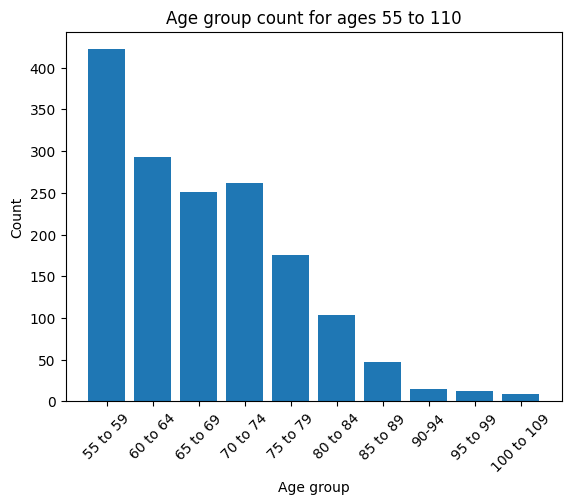

In [202]:

# Select data for age groups 55 to 110
age_group = age_range_df.iloc[11:21]
age_group['xlabel'] = ['55 to 59','60 to 64', '65 to 69', '70 to 74', '75 to 79', '80 to 84', '85 to 89', '90-94', '95 to 99', '100 to 109']

# Create a bar chart of the age group count
plt.bar(age_group['xlabel'], age_group['AgeGrp_Count'])

# Add labels and title
plt.xticks(rotation =45)
plt.xlabel('Age group')
plt.ylabel('Count')
plt.title('Age group count for ages 55 to 110')

# Display the plot
plt.show()



#### Observations
- A steady decline is seen in the number of people for each group.
- This decline is used to estimate the number of deaths in a year for the population dataset

### Dependency Ratio

In [203]:
#filter data of children at age at which can start full time work
young_dependants= len(cdf[cdf.Age <16]) 

#filter data of older dependants 
old_dependants = len (cdf[cdf.Age >= 65])

#calculate active workforce
working_pop = len(cdf[(cdf.Age>=16)&(cdf.Age<65)])

#calculate dependant population
dep_pop = young_dependants + old_dependants

#calculate dependant ratio
dep_ratio = (dep_pop/working_pop)*100

#print dependant ratio
print(f'The Dependency ratio of the population is {dep_ratio:.2f}')

The Dependency ratio of the population is 46.79


### Commuters

In [204]:
#filter and count length of visitors in the town
visitors = len(cdf[cdf["Relationship_to_Head_of_House"] == 'Visitor'])

#filter and count length of University students in the town
university_student = len(cdf[(cdf["Occupation_Class"] == "University Student")])

#filter and count length of university staff in the town
university_staff = len(cdf[cdf['Occupation'].str.contains('Lecturer|Research|Professor|research|lecturer|Higher') & ~cdf['Occupation'].
                           str.contains('Retired')])

#calculate commuters
commuters = visitors + university_student + university_staff

#calculate commuters ratio
commuters_ratio = (commuters/total_pop) * 100

#print commuters ratio
print(f' {commuters_ratio:.2f}% of the population are commuters')

 8.72% of the population are commuters


### Affluence

In [205]:
#calculating number of high paying job roles in the data set
senior_occupation = len(cdf[cdf['Occupation'].str.contains('Manager|manager|Chief|executive|Senior|Airline|airline|director|Medical|Nurse|Architect|Engineer') & (~cdf['Occupation'].str.
                                                           contains('Retired')) | (cdf['Occupation'].str.startswith('IT'))])
#calculate affluence rate
affluent_occupation = (senior_occupation/employed_pop)*100

#print number of persons working in high paying roles
print (senior_occupation)

#print affluence rate
print(f'{affluent_occupation:.2f}% of the population work in managerial roles')

745
17.81% of the population work in managerial roles


### Immigration Rate

In [206]:
#filter dataset to include lodgers excluding divorced and calculating the length
immigrants = len(cdf[(cdf['Relationship_to_Head_of_House'] == 'Lodger') & ((cdf['Marital_Status'] == 'Single') | 
                                                                           (cdf['Marital_Status'] == 'Widowed'))])
#print total immigrants
print('Total immigrants: ', immigrants)

#estimate immigration rate
immigration_rate = (immigrants/total_pop) * 1000

#print result
print(f'Immigration rate: {immigration_rate:.2f}')

Total immigrants:  157
Immigration rate: 20.25


### Emmigration Rate

In [207]:
# Group the data by gender and marital status, and count the number of people
grouped_data = cdf.groupby(['Gender', 'Marital_Status']).size().reset_index(name='Count')

# grab the count of each gender
female_divorced = grouped_data.loc[(grouped_data['Gender'] == 'Female') & (grouped_data['Marital_Status'] == 'Divorced')]['Count'].values[0]
male_divorced = grouped_data.loc[(grouped_data['Gender'] == 'Male') & (grouped_data['Marital_Status'] == 'Divorced'), 'Count'].values[0]


#filter number of visitors that are divorced
divorced_visitors = len(cdf[(cdf["Relationship_to_Head_of_House"] == 'Visitor') & (cdf["Marital_Status"] == 'Divorced')])

#calculate emigrants as difference between divorced male and females, excluding divorced visitors
emigrants = female_divorced - male_divorced - divorced_visitors

#calculate emigration rate
emigration_rate = (emigrants /total_pop) * 1000

#print emigrants and emigration rate
print(f'Total Emigrants: {emigrants}')
print(f'Emigration Rate: {emigration_rate:.2f}')


Total Emigrants: 160
Emigration Rate: 20.63


### Population Change

In [208]:
#calculating the change in population

pop_change = (birth_rate + immigration_rate) - (mortality_rate + emigration_rate)

#print change in population
print(f'The change in population is {pop_change:.2f}')

The change in population is 0.39


### Pandas Profiling

In [209]:
#!pip install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [210]:
from ydata_profiling import ProfileReport
profile = ProfileReport(cdf, title='Census Pandas Profiling Report', explorative = True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]